In [1]:
import numpy as np
import argparse
import os

from pykin.utils import plot_utils as p_utils
from pytamp.benchmark import Benchmark3_for_rearr as Benchmark3
# from pytamp.benchmark import Benchmark3

from pytamp.search.mcts_for_rearragement import MCTS_rearrangement 


# ? python3 benchmark2_test.py --budgets 100 --max_depth 14 --seed 1 --algo bai_perturb
parser = argparse.ArgumentParser(description="Test Benchmark 3.")
parser.add_argument("--budgets", metavar="T", type=int, default=100, help="Horizon")
parser.add_argument("--max_depth", metavar="H", type=int, default=12, help="Max depth")
parser.add_argument("--seed", metavar="i", type=int, default=16, help="A random seed")
parser.add_argument(
    "--algo",
    metavar="alg",
    type=str,
    default="uct",
    choices=["bai_perturb", "bai_ucb", "uct", "random", "greedy"],
    help="Choose one (bai_perturb, bai_ucb, uct)",
)
parser.add_argument(
    "--debug_mode",
    default=False,
    type=lambda x: (str(x).lower() == "true"),
    help="Debug mode",
)
parser.add_argument(
    "--bottle_number",
    metavar="N",
    type=int,
    default=3,
    help="Bottle Number(6 or less.)",
)
try:
    args = parser.parse_args() #call from command line
except:
    args = parser.parse_args(args=[]) #call from notebook
    

debug_mode = args.debug_mode
budgets = args.budgets
max_depth = args.max_depth
algo = args.algo
seed = args.seed
number = args.bottle_number
np.random.seed(seed)

benchmark3 = Benchmark3(robot_name="panda", geom="collision", is_pyplot=False)


2023-08-10 20:27:53.443402: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
usage: ipykernel_launcher.py [-h] [--budgets T] [--max_depth H] [--seed i]
                             [--algo alg] [--debug_mode DEBUG_MODE]
                             [--bottle_number N]
ipykernel_launcher.py: error: unrecognized arguments: -f /home/juju/.local/share/jupyter/runtime/kernel-04f64a63-6831-493c-a5fb-2b4e10658d15.json


*********************** Logical States ***********************
OrderedDict([('rect_box0',
              {'on': Object(name=table, pos=[ 1.   -0.6  -0.03])}),
             ('rect_box1',
              {'on': Object(name=rect_box0, pos=[0.72       0.3        0.79294036])}),
             ('rect_box2',
              {'on': Object(name=rect_box1, pos=[0.72       0.3        0.86631922])}),
             ('square_box0',
              {'on': Object(name=table, pos=[ 1.   -0.6  -0.03])}),
             ('square_box1',
              {'on': Object(name=square_box0, pos=[0.8        0.4        0.79125948])}),
             ('square_box2',
              {'on': Object(name=square_box1, pos=[0.8        0.4        0.86225948])}),
             ('goal_can',
              {'on': Object(name=clearbox, pos=[0.7        0.4        0.73547763])}),
             ('milk1',
              {'on': Object(name=clearbox, pos=[0.7        0.4        0.73547763])}),
             ('milk2',
              {'on': Object(name=clea

In [10]:
for n, m in benchmark3.init_scene._support_objects.items():
    print(n)
    
    
np.random.normal(size=(5))

table
tray_blue


array([-0.88131752,  0.20211861, -0.49594194, -2.81867088, -1.33884596])

In [3]:
# fig, ax = p_utils.init_3d_figure(name="Benchamrk 1")
# # init_scene
# benchmark3.scene_mngr.render_scene(ax)
# benchmark3.render_axis(benchmark3.scene_mngr)
# benchmark3.scene_mngr.show()


In [6]:

final_level_1_values = []
final_level_2_values = []
final_optimal_nodes = []
final_pnp_all_joint_paths = []
final_pick_all_objects = []
final_place_all_object_poses = []
# final_optimal_trees = []
c_list = 10 ** np.linspace(-2, 2.0, 10)
# c_list = c_list[6:]
c = 2.5

mcts = MCTS_rearrangement(
    scene_mngr=benchmark3.scene_mngr,
    init_scene = benchmark3.init_scene,
    sampling_method=algo,
    budgets=budgets,
    max_depth=max_depth,
    c=c_list[6],
    debug_mode=debug_mode,
    use_pick_action=False,
    consider_next_scene=False,
    do_level_2=True,
    
)

mcts.only_optimize_1 = False

2023-08-09 19:59:30.269716: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2023-08-09 19:59:30.318944: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-08-09 19:59:30.319049: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce RTX 3080 computeCapability: 8.6
coreClock: 1.74GHz coreCount: 68 deviceMemorySize: 9.77GiB deviceMemoryBandwidth: 707.88GiB/s
2023-08-09 19:59:30.319077: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2023-08-09 19:59:30.321007: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2023-08-09 19:59:30.321069: I tensorflow/stream_executor/plat

/home/juju/contact_graspnet/pointnet2/tf_ops/sampling
<module 'contact_graspnet.contact_graspnet' from '/home/juju/contact_graspnet/contact_graspnet/contact_graspnet.py'>
--- Get model
Instructions for updating:
Colocations handled automatically by placer.


/home/juju/contact_graspnet/contact_graspnet/config_utils.py:42: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  global_config = yaml.load(f)
/home/juju/anaconda3/envs/contact_graspnet/lib/python3.8/site-packages/tensorflow/python/keras/legacy_tf_layers/normalization.py:307: UserWarning: `tf.layers.batch_normalization` is deprecated and will be removed in a future version. Please use `tf.keras.layers.BatchNormalization` instead. In particular, `tf.control_dependencies(tf.GraphKeys.UPDATE_OPS)` should not be used (consult the `tf.keras.layers.BatchNormalization` documentation).
  warnings.warn(
/home/juju/anaconda3/envs/contact_graspnet/lib/python3.8/site-packages/tensorflow/python/keras/engine/base_layer_v1.py:1692: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` i

Instructions for updating:
`NHWC` for data_format is deprecated, use `NWC` instead
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


2023-08-09 19:59:32.391748: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-09 19:59:32.392776: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-08-09 19:59:32.392859: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce RTX 3080 computeCapability: 8.6
coreClock: 1.74GHz coreCount: 68 deviceMemorySize: 9.77GiB deviceMemoryBandwidth: 707.88GiB/s
2023-08-09 19:59:32.392906: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), 

INFO:tensorflow:Restoring parameters from /home/juju/contact_graspnet/checkpoints/scene_test_2048_bs3_hor_sigma_001/model.ckpt-144144


2023-08-09 19:59:32.678577: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1258] Device interconnect StreamExecutor with strength 1 edge matrix:
2023-08-09 19:59:32.678602: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1264]      0 
2023-08-09 19:59:32.678606: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1277] 0:   N 
2023-08-09 19:59:32.678744: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-08-09 19:59:32.678837: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-08-09 19:59:32.678909: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-

In [7]:
import time
start_time = time.time()
idx = 0 


for i in range(budgets):
# for i in range(10):
    print(
        f"\n[{idx+1}/{len(c_list)}] Benchmark: {benchmark3.scene_mngr.scene.bench_num}, Algo: {algo}, C: {c}, Seed: {seed}"
    )
    mcts.do_planning_rearrange(i)

    print("########### Running time : ", time.time()- start_time, "##############")
    final_level_1_values.append(mcts.values_for_level_1)



[1/10] Benchmark: 3, Algo: uct, C: 2.5, Seed: 16
=========== Search iteration : 1 ===========
[Action] Rearr milk4 to table
[Reward] S(0) -> A(5) -> S'(7) Reward : 2
[Action] Rearr milk1 to table
[Reward] S(7) -> A(10) -> S'(12) Reward : 2
[Action] Rearr square_box2 to table
[Reward] S(12) -> A(13) -> S'(16) Reward : 2
[Action] Rearr goal_can to tray_blue
[Reward] S(16) -> A(19) -> S'(20) Reward : 2
Success!!!!!
Terminal State! Reward is 10
Max value level 1 before assign : 0
Max value level 1 after assign : 16.0
last max  value level 1 : 0
milk4
Extracted Region Cube Size:  0.4
Random sample points 


2023-08-09 19:59:33.764993: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudnn.so.8
2023-08-09 19:59:34.132282: I tensorflow/stream_executor/cuda/cuda_dnn.cc:359] Loaded cuDNN version 8201
2023-08-09 19:59:34.702005: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2023-08-09 19:59:35.006870: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublasLt.so.11


Generated 7 grasps for object milk4
solve with LM1
Iterators : 17
WorkingTime[inverse_kinematics]: 0.0127 sec

solve with LM1
Iterators : 7
WorkingTime[inverse_kinematics]: 0.0034 sec

solve with LM1
Iterators : 8
WorkingTime[inverse_kinematics]: 0.0038 sec

milk1
Extracted Region Cube Size:  0.4
Random sample points 
Generated 1 grasps for object milk1
solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0454 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0438 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0436 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0435 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0446 sec

failed to generate grasp pose for milk1
Extracted Region Cube Size:  0.4002828080641223
Random sample points 
Generated 2 grasps for object milk1
solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0450 sec

solve with LM1
Iterators : 100
WorkingTime

failed to generate grasp pose for goal_can
Extracted Region Cube Size:  0.4
Random sample points 
Generated 2 grasps for object goal_can
Augment 2 y axis rotation from -pi/3 ~ pi/3 :  (12, 4, 4)
Collision free grasps step 3 :  (0,)
failed to generate grasp pose for goal_can
This optimal subnodes([0, 1, 21, 23, 28, 30, 31]) is infeasible subnodes.
Tree node value :  0
Max_value level 1 at failed :  0
 level 2 value : -inf 
Add level_1_node!
########### Running time :  9.873784065246582 ##############

[1/10] Benchmark: 3, Algo: uct, C: 2.5, Seed: 16
=========== Search iteration : 3 ===========
[Action] Rearr milk1 to table
[Reward] S(0) -> A(2) -> S'(32) Reward : 2
[Action] Rearr milk4 to table
[Reward] S(32) -> A(36) -> S'(38) Reward : 2
[Action] Rearr square_box2 to table
[Reward] S(38) -> A(39) -> S'(43) Reward : 2
[Action] Rearr goal_can to tray_blue
[Reward] S(43) -> A(46) -> S'(47) Reward : 2
Success!!!!!
Terminal State! Reward is 10
Max value level 1 before assign : 0
Max value l

Iterators : 100
WorkingTime[inverse_kinematics]: 0.0458 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0447 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0442 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0442 sec

solve with LM1
Iterators : 71
WorkingTime[inverse_kinematics]: 0.0321 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0457 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0446 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0441 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0444 sec

solve with LM1
Iterators : 65
WorkingTime[inverse_kinematics]: 0.0295 sec

failed to generate grasp pose for square_box2
goal_can
Extracted Region Cube Size:  0.4
Random sample points 
Generated 1 grasps for object goal_can
Augment 2 y axis rotation from -pi/3 ~ pi/3 :  (6, 4, 4)
Collision free grasps step 3 :  (0,)
failed to gene

[Action] Rearr goal_can to tray_blue
[Reward] S(83) -> A(88) -> S'(89) Reward : 2
Success!!!!!
Terminal State! Reward is 10
Max value level 1 before assign : 0
Max value level 1 after assign : 16.0
last max  value level 1 : 0
already has grasp_poses
square_box2
Extracted Region Cube Size:  0.4
Random sample points 
Generated 7 grasps for object square_box2
solve with LM1
Iterators : 13
WorkingTime[inverse_kinematics]: 0.0065 sec

solve with LM1
Iterators : 8
WorkingTime[inverse_kinematics]: 0.0038 sec

solve with LM1
Iterators : 54
WorkingTime[inverse_kinematics]: 0.0238 sec

milk4
Extracted Region Cube Size:  0.4
Random sample points 
Generated 28 grasps for object milk4
solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0454 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0452 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0456 sec

solve with LM1
Iterators : 77
WorkingTime[inverse_kinematics]: 0.0363 sec

solve with LM1
I

Iterators : 100
WorkingTime[inverse_kinematics]: 0.0444 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0439 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0435 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0442 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0449 sec

failed to generate grasp pose for milk1
Extracted Region Cube Size:  0.4004670008175475
Random sample points 
Generated 4 grasps for object milk1
solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0437 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0437 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0440 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0437 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0444 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0436 sec

solve with LM1
Iterators : 100
Wo

Generated 8 grasps for object milk1
solve with LM1
Iterators : 19
WorkingTime[inverse_kinematics]: 0.0094 sec

solve with LM1
Iterators : 1
WorkingTime[inverse_kinematics]: 0.0010 sec

solve with LM1
Iterators : 1
WorkingTime[inverse_kinematics]: 0.0010 sec

solve with LM1
Iterators : 1
WorkingTime[inverse_kinematics]: 0.0010 sec

solve with LM1
Iterators : 1
WorkingTime[inverse_kinematics]: 0.0010 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0435 sec

solve with LM1
Iterators : 9
WorkingTime[inverse_kinematics]: 0.0044 sec

solve with LM1
Iterators : 13
WorkingTime[inverse_kinematics]: 0.0060 sec

milk4
Extracted Region Cube Size:  0.4
Random sample points 
Generated 20 grasps for object milk4
solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0453 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0449 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0449 sec

solve with LM1
Iterators : 68
WorkingTime[

failed to generate grasp pose for goal_can
Extracted Region Cube Size:  0.4
Generated 1 grasps for object goal_can
Augment 2 y axis rotation from -pi/3 ~ pi/3 :  (6, 4, 4)
Collision free grasps step 3 :  (0,)
failed to generate grasp pose for goal_can
Extracted Region Cube Size:  0.4
failed to generate grasp pose for goal_can
This optimal subnodes([0, 1, 21, 24, 123, 124, 128, 132, 134, 136, 138, 139, 141, 142, 143]) is infeasible subnodes.
Tree node value :  0
Max_value level 1 at failed :  0
 level 2 value : -inf 
Add level_1_node!
########### Running time :  41.90471410751343 ##############

[1/10] Benchmark: 3, Algo: uct, C: 2.5, Seed: 16
=========== Search iteration : 12 ===========
[Action] Rearr milk2 to table
[Reward] S(0) -> A(3) -> S'(48) Reward : 2
[Action] Rearr milk1 to table
[Reward] S(48) -> A(49) -> S'(144) Reward : 2
[Action] Rearr milk4 to table
[Reward] S(144) -> A(147) -> S'(149) Reward : 2
[Action] Rearr milk3 to table
[Reward] S(149) -> A(151) -> S'(153) Reward : 

[Action] Rearr goal_can to tray_blue
[Reward] S(171) -> A(175) -> S'(176) Reward : 2
Success!!!!!
Terminal State! Reward is 10
Max value level 1 before assign : 0
Max value level 1 after assign : 17.5
last max  value level 1 : 0
already has grasp_poses
milk1
Extracted Region Cube Size:  0.40068509713681233
Random sample points 
Generated 3 grasps for object milk1
solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0432 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0427 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0426 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0427 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0436 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0431 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0431 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0431 sec

solve with LM1
Iterators :

Iterators : 100
WorkingTime[inverse_kinematics]: 0.0440 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0538 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0431 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0430 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0432 sec

solve with LM1
Iterators : 91
WorkingTime[inverse_kinematics]: 0.0411 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0434 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0440 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0442 sec

solve with LM1
Iterators : 88
WorkingTime[inverse_kinematics]: 0.0385 sec

solve with LM1
Iterators : 1
WorkingTime[inverse_kinematics]: 0.0010 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0438 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0438 sec

solve with LM1
Iterators : 100


Iterators : 100
WorkingTime[inverse_kinematics]: 0.0448 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0438 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0448 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0448 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0446 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0447 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0442 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0439 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0440 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0443 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0448 sec

failed to generate grasp pose for square_box1
Extracted Region Cube Size:  0.4
Random sample points 
Generated 10 grasps for object square_box1
solve with LM1
Iterators : 100
Work

[INFO] [RRT Star Planner]: Start to compute RRT-star Planning
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000001


Generated 2 grasps for object goal_can
solve with LM1
Iterators : 13
WorkingTime[inverse_kinematics]: 0.0067 sec

solve with LM1
Iterators : 5
WorkingTime[inverse_kinematics]: 0.0026 sec

solve with LM1
Iterators : 5
WorkingTime[inverse_kinematics]: 0.0026 sec

pick square_box2
solve with LM1
Iterators : 12
WorkingTime[inverse_kinematics]: 0.0059 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 4 --> 30
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.024814
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.001640
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning


Cost is 2.7
WorkingTime[run]: 1.2545 sec

WorkingTime[run]: 0.0487 sec

WorkingTime[run]: 0.0474 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 4 --> 30
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000001
[WARNING] [RRT Star Planner]: Occur Collision for goal joints


Cost is 3.162
WorkingTime[run]: 1.3261 sec

solve with LM1
Iterators : 16
WorkingTime[inverse_kinematics]: 0.0109 sec

{('panda_link_7', 'clearbox'), ('right_gripper', 'clearbox'), ('rightfinger', 'clearbox')}
*********************** Scene ***********************
{'clearbox': Object(name=clearbox, pos=[0.7        0.4        0.73547763]),
 'goal_can': Object(name=goal_can, pos=[0.72       0.4        0.83685286]),
 'milk1': Object(name=milk1, pos=[0.76       0.48       0.84439365]),
 'milk2': Object(name=milk2, pos=[0.64       0.42       0.84439365]),
 'milk3': Object(name=milk3, pos=[0.6        0.5        0.84439365]),
 'milk4': Object(name=milk4, pos=[0.58       0.35       0.84439365]),
 'rect_box0': Object(name=rect_box0, pos=[0.72       0.3        0.79294036]),
 'rect_box1': Object(name=rect_box1, pos=[0.72       0.3        0.86631922]),
 'rect_box2': Object(name=rect_box2, pos=[0.72       0.3        0.93969808]),
 'square_box0': Object(name=square_box0, pos=[0.8        0.4        0.

[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000001
[WARNING] [RRT Star Planner]: Occur Collision for goal joints
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000000
[WARNING] [RRT Star Planner]: Occur Collision for goal joints
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000001
[WARNING] [RRT Star Planner]: Occur Collision for goal joints


Iterators : 13
WorkingTime[inverse_kinematics]: 0.0066 sec

{('panda_link_7', 'clearbox'), ('right_gripper', 'clearbox'), ('rightfinger', 'clearbox')}
*********************** Scene ***********************
{'clearbox': Object(name=clearbox, pos=[0.7        0.4        0.73547763]),
 'goal_can': Object(name=goal_can, pos=[0.72       0.4        0.83685286]),
 'milk1': Object(name=milk1, pos=[0.76       0.48       0.84439365]),
 'milk2': Object(name=milk2, pos=[0.64       0.42       0.84439365]),
 'milk3': Object(name=milk3, pos=[0.6        0.5        0.84439365]),
 'milk4': Object(name=milk4, pos=[0.58       0.35       0.84439365]),
 'rect_box0': Object(name=rect_box0, pos=[0.72       0.3        0.79294036]),
 'rect_box1': Object(name=rect_box1, pos=[0.72       0.3        0.86631922]),
 'rect_box2': Object(name=rect_box2, pos=[0.72       0.3        0.93969808]),
 'square_box0': Object(name=square_box0, pos=[0.8        0.4        0.79125948]),
 'square_box1': Object(name=square_box1, pos=[0

Iterators : 32
WorkingTime[inverse_kinematics]: 0.0154 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0447 sec

solve with LM1
Iterators : 23
WorkingTime[inverse_kinematics]: 0.0106 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0442 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0444 sec

solve with LM1
Iterators : 16
WorkingTime[inverse_kinematics]: 0.0077 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0444 sec

solve with LM1


[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000001
[WARNING] [RRT Star Planner]: Occur Collision for goal joints


Iterators : 100
WorkingTime[inverse_kinematics]: 0.0449 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0447 sec

solve with LM1
Iterators : 13
WorkingTime[inverse_kinematics]: 0.0062 sec

{('panda_link_7', 'clearbox'), ('right_gripper', 'clearbox'), ('rightfinger', 'clearbox')}
*********************** Scene ***********************
{'clearbox': Object(name=clearbox, pos=[0.7        0.4        0.73547763]),
 'goal_can': Object(name=goal_can, pos=[0.72       0.4        0.83685286]),
 'milk1': Object(name=milk1, pos=[0.76       0.48       0.84439365]),
 'milk2': Object(name=milk2, pos=[0.64       0.42       0.84439365]),
 'milk3': Object(name=milk3, pos=[0.6        0.5        0.84439365]),
 'milk4': Object(name=milk4, pos=[0.58       0.35       0.84439365]),
 'rect_box0': Object(name=rect_box0, pos=[0.72       0.3        0.79294036]),
 'rect_box1': Object(name=rect_box1, pos=[0.72       0.3        0.86631922]),
 'rect_box2': Object(name=rect_box2, pos=[0.72       0.

[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000003
[WARNING] [RRT Star Planner]: Occur Collision for goal joints


Iterators : 100
WorkingTime[inverse_kinematics]: 0.0476 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0445 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0445 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0442 sec

solve with LM1
Iterators : 7
WorkingTime[inverse_kinematics]: 0.0035 sec

{('panda_link_7', 'clearbox'), ('right_gripper', 'clearbox'), ('rightfinger', 'clearbox')}
*********************** Scene ***********************
{'clearbox': Object(name=clearbox, pos=[0.7        0.4        0.73547763]),
 'goal_can': Object(name=goal_can, pos=[0.72       0.4        0.83685286]),
 'milk1': Object(name=milk1, pos=[0.76       0.48       0.84439365]),
 'milk2': Object(name=milk2, pos=[0.64       0.42       0.84439365]),
 'milk3': Object(name=milk3, pos=[0.6        0.5        0.84439365]),
 'milk4': Object(name=milk4, pos=[0.58       0.35       0.84439365]),
 'rect_box0': Object(name=rect_box0, pos=[0.72       0.3    

[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000000
[WARNING] [RRT Star Planner]: Occur Collision for goal joints
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000000
[WARNING] [RRT Star Planner]: Occur Collision for goal joints


Iterators : 100
WorkingTime[inverse_kinematics]: 0.0450 sec

solve with LM1
Iterators : 13
WorkingTime[inverse_kinematics]: 0.0063 sec

{('panda_link_7', 'clearbox'), ('right_gripper', 'clearbox'), ('rightfinger', 'clearbox')}
*********************** Scene ***********************
{'clearbox': Object(name=clearbox, pos=[0.7        0.4        0.73547763]),
 'goal_can': Object(name=goal_can, pos=[0.72       0.4        0.83685286]),
 'milk1': Object(name=milk1, pos=[0.76       0.48       0.84439365]),
 'milk2': Object(name=milk2, pos=[0.64       0.42       0.84439365]),
 'milk3': Object(name=milk3, pos=[0.6        0.5        0.84439365]),
 'milk4': Object(name=milk4, pos=[0.58       0.35       0.84439365]),
 'rect_box0': Object(name=rect_box0, pos=[0.72       0.3        0.79294036]),
 'rect_box1': Object(name=rect_box1, pos=[0.72       0.3        0.86631922]),
 'rect_box2': Object(name=rect_box2, pos=[0.72       0.3        0.93969808]),
 'square_box0': Object(name=square_box0, pos=[0.8    

[ERROR] [RRT Star Planner]: Not found IK solution


Iterators : 100
WorkingTime[inverse_kinematics]: 0.0452 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0443 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0442 sec

WorkingTime[run]: 1.4050 sec

Place joint Fail
Tree node value :  0
[[0, 5, 7, 10, 12, 13, 16, 19, 20], [0, 5, 7, 10, 12, 13, 16, 19, 20], [0, 1, 21, 23, 28, 30, 31], [0, 2, 32, 36, 38, 39, 43, 46, 47], [0, 2, 32, 36, 38, 39, 43, 46, 47], [0, 2, 32, 36, 38, 39, 43, 46, 47], [0, 3, 48, 52, 53], [0, 4, 54, 55, 61, 63, 65, 66, 71, 74, 75], [0, 6, 76], [0, 4, 54, 56, 77, 81, 83, 88, 89], [0, 2, 32, 33, 90, 91, 95, 96, 97], [0, 5, 7, 8, 98, 99, 101, 104, 105], [0, 1, 21, 22, 106, 108, 113, 116, 118, 121, 122], [0, 1, 21, 22, 106, 108, 113, 116, 118, 121, 122], [0, 1, 21, 24, 123, 124, 128, 132, 134, 136, 138, 139, 141, 142, 143], [0, 3, 48, 49, 144, 147, 149, 151, 153, 155, 156], [0, 3, 48, 49, 144, 147, 149, 151, 153, 155, 156], [0, 3, 48, 50, 157, 160, 161], [0, 4, 54, 57, 162, 1

[Reward] S(230) -> A(232) -> S'(233) Reward : 2
Success!!!!!
Terminal State! Reward is 10
Max value level 1 before assign : 0
Max value level 1 after assign : 16.0
last max  value level 1 : 0
already has grasp_poses
milk4
Extracted Region Cube Size:  0.4
Random sample points 
Generated 19 grasps for object milk4
solve with LM1
Iterators : 16
WorkingTime[inverse_kinematics]: 0.0093 sec

solve with LM1
Iterators : 4
WorkingTime[inverse_kinematics]: 0.0021 sec

solve with LM1
Iterators : 3
WorkingTime[inverse_kinematics]: 0.0016 sec

rect_box2
Extracted Region Cube Size:  0.4
Random sample points 
Generated 44 grasps for object rect_box2
solve with LM1
Iterators : 13
WorkingTime[inverse_kinematics]: 0.0073 sec

solve with LM1
Iterators : 4
WorkingTime[inverse_kinematics]: 0.0022 sec

solve with LM1
Iterators : 4
WorkingTime[inverse_kinematics]: 0.0021 sec

goal_can
Extracted Region Cube Size:  0.4
Random sample points 
failed to generate grasp pose for goal_can
Extracted Region Cube Size:

[INFO] [RRT Star Planner]: Start to compute RRT-star Planning
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000001


Generated 2 grasps for object goal_can
solve with LM1
Iterators : 17
WorkingTime[inverse_kinematics]: 0.0093 sec

solve with LM1
Iterators : 5
WorkingTime[inverse_kinematics]: 0.0026 sec

solve with LM1
Iterators : 5
WorkingTime[inverse_kinematics]: 0.0026 sec

pick milk2
solve with LM1
Iterators : 18
WorkingTime[inverse_kinematics]: 0.0090 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 6 --> 50
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000002
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000000
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning


Cost is 3.93
WorkingTime[run]: 1.2472 sec

WorkingTime[run]: 0.0479 sec

WorkingTime[run]: 0.0471 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 6 --> 50
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000002


Cost is 4.021
WorkingTime[run]: 1.2311 sec

solve with LM1
Iterators : 9
WorkingTime[inverse_kinematics]: 0.0050 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 3 --> 20
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000000
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning


Cost is 2.159
WorkingTime[run]: 1.3149 sec

WorkingTime[run]: 0.0477 sec

WorkingTime[run]: 0.0474 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 3 --> 20
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000002


Cost is 2.103
WorkingTime[run]: 1.3685 sec

Success pnp
pick milk4
solve with LM1
Iterators : 16
WorkingTime[inverse_kinematics]: 0.0080 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 11 --> 100
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning


Cost is 3.727
WorkingTime[run]: 1.3311 sec

WorkingTime[run]: 0.0465 sec

WorkingTime[run]: 0.0580 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 7 --> 60
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000002


Cost is 3.791
WorkingTime[run]: 1.3191 sec

solve with LM1
Iterators : 14
WorkingTime[inverse_kinematics]: 0.0069 sec

solve with LM1
Iterators : 17
WorkingTime[inverse_kinematics]: 0.0080 sec

solve with LM1
Iterators : 23
WorkingTime[inverse_kinematics]: 0.0104 sec

solve with LM1
Iterators : 17
WorkingTime[inverse_kinematics]: 0.0079 sec

solve with LM1
Iterators : 28
WorkingTime[inverse_kinematics]: 0.0127 sec

solve with LM1
Iterators : 18
WorkingTime[inverse_kinematics]: 0.0082 sec

solve with LM1
Iterators : 13
WorkingTime[inverse_kinematics]: 0.0060 sec

solve with LM1
Iterators : 23
WorkingTime[inverse_kinematics]: 0.0104 sec

solve with LM1
Iterators : 13
WorkingTime[inverse_kinematics]: 0.0060 sec

solve with LM1
Iterators : 12
WorkingTime[inverse_kinematics]: 0.0056 sec

solve with LM1
Iterators : 20
WorkingTime[inverse_kinematics]: 0.0091 sec

solve with LM1
Iterators : 16
WorkingTime[inverse_kinematics]: 0.0073 sec

solve with LM1
Iterators : 10
WorkingTime[inverse_kinema

[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 6 --> 50
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning


Cost is 3.828
WorkingTime[run]: 1.4603 sec

WorkingTime[run]: 0.0479 sec

WorkingTime[run]: 0.0477 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 5 --> 40
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000003


Cost is 4.011
WorkingTime[run]: 1.3430 sec

Success pnp
pick rect_box2
solve with LM1
Iterators : 12
WorkingTime[inverse_kinematics]: 0.0059 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 4 --> 30
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000002
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000000
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning


Cost is 2.981
WorkingTime[run]: 1.3232 sec

WorkingTime[run]: 0.0471 sec

WorkingTime[run]: 0.0471 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 5 --> 40
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000003
[WARNING] [RRT Star Planner]: Occur Collision for goal joints
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000001
[WARNING] [RRT Star Planner]: Occur Collision for goal joints
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000000
[WARNING] [RRT Star Planner]: Occur Collision for goal joints
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000003
[WARNING] [RRT Star Planner]: Occur Collision for goal joints
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000002
[WARNING] [RRT Star Planner]: Occur Collision for goal joints
[INFO] [RRT Star Planner]: The joint li

Cost is 3.051
WorkingTime[run]: 1.3744 sec

solve with LM1
Iterators : 13
WorkingTime[inverse_kinematics]: 0.0098 sec

{('right_gripper', 'milk2')}
*********************** Scene ***********************
{'clearbox': Object(name=clearbox, pos=[0.7        0.4        0.73547763]),
 'goal_can': Object(name=goal_can, pos=[0.72       0.4        0.83685286]),
 'milk1': Object(name=milk1, pos=[0.76       0.48       0.84439365]),
 'milk2': Object(name=milk2, pos=[ 0.53162936 -0.34453399  0.82393415]),
 'milk3': Object(name=milk3, pos=[0.6        0.5        0.84439365]),
 'milk4': Object(name=milk4, pos=[ 0.44130512 -0.41186571  0.82393415]),
 'rect_box0': Object(name=rect_box0, pos=[0.72       0.3        0.79294036]),
 'rect_box1': Object(name=rect_box1, pos=[0.72       0.3        0.86631922]),
 'square_box0': Object(name=square_box0, pos=[0.8        0.4        0.79125948]),
 'square_box1': Object(name=square_box1, pos=[0.8        0.4        0.86225948]),
 'square_box2': Object(name=square_box2,

[WARNING] [RRT Star Planner]: Occur Collision for goal joints
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000000
[WARNING] [RRT Star Planner]: Occur Collision for goal joints
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000003
[WARNING] [RRT Star Planner]: Occur Collision for goal joints
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000001
[WARNING] [RRT Star Planner]: Occur Collision for goal joints


{('right_gripper', 'milk2')}
*********************** Scene ***********************
{'clearbox': Object(name=clearbox, pos=[0.7        0.4        0.73547763]),
 'goal_can': Object(name=goal_can, pos=[0.72       0.4        0.83685286]),
 'milk1': Object(name=milk1, pos=[0.76       0.48       0.84439365]),
 'milk2': Object(name=milk2, pos=[ 0.53162936 -0.34453399  0.82393415]),
 'milk3': Object(name=milk3, pos=[0.6        0.5        0.84439365]),
 'milk4': Object(name=milk4, pos=[ 0.44130512 -0.41186571  0.82393415]),
 'rect_box0': Object(name=rect_box0, pos=[0.72       0.3        0.79294036]),
 'rect_box1': Object(name=rect_box1, pos=[0.72       0.3        0.86631922]),
 'square_box0': Object(name=square_box0, pos=[0.8        0.4        0.79125948]),
 'square_box1': Object(name=square_box1, pos=[0.8        0.4        0.86225948]),
 'square_box2': Object(name=square_box2, pos=[0.8        0.4        0.93325948]),
 'table': Object(name=table, pos=[ 1.   -0.6  -0.03]),
 'tray_blue': Object(n

[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000000
[WARNING] [RRT Star Planner]: Occur Collision for goal joints
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000001
[WARNING] [RRT Star Planner]: Occur Collision for goal joints
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000000
[WARNING] [RRT Star Planner]: Occur Collision for goal joints
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000002
[WARNING] [RRT Star Planner]: Occur Collision for goal joints
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000002
[WARNING] [RRT Star Planner]: Occur Collision for goal joints
[ERROR] [RRT Star Planner]: Not found IK solution


Iterators : 18
WorkingTime[inverse_kinematics]: 0.0090 sec

solve with LM1
Iterators : 34
WorkingTime[inverse_kinematics]: 0.0159 sec

solve with LM1
Iterators : 23
WorkingTime[inverse_kinematics]: 0.0172 sec

solve with LM1
Iterators : 15
WorkingTime[inverse_kinematics]: 0.0078 sec

{('right_gripper', 'milk2')}
*********************** Scene ***********************
{'clearbox': Object(name=clearbox, pos=[0.7        0.4        0.73547763]),
 'goal_can': Object(name=goal_can, pos=[0.72       0.4        0.83685286]),
 'milk1': Object(name=milk1, pos=[0.76       0.48       0.84439365]),
 'milk2': Object(name=milk2, pos=[ 0.53162936 -0.34453399  0.82393415]),
 'milk3': Object(name=milk3, pos=[0.6        0.5        0.84439365]),
 'milk4': Object(name=milk4, pos=[ 0.44130512 -0.41186571  0.82393415]),
 'rect_box0': Object(name=rect_box0, pos=[0.72       0.3        0.79294036]),
 'rect_box1': Object(name=rect_box1, pos=[0.72       0.3        0.86631922]),
 'square_box0': Object(name=square_box

[Action] Rearr goal_can to tray_blue
[Reward] S(234) -> A(237) -> S'(238) Reward : 2
Success!!!!!
Terminal State! Reward is 10
Max value level 1 before assign : 0
Max value level 1 after assign : 14.5
last max  value level 1 : 0
already has grasp_poses
milk2
Extracted Region Cube Size:  0.4
Random sample points 
Generated 1 grasps for object milk2
Augment 2 y axis rotation from -pi/3 ~ pi/3 :  (6, 4, 4)
Collision free grasps step 3 :  (1, 4, 4)
solve with LM1
Iterators : 13
WorkingTime[inverse_kinematics]: 0.0064 sec

solve with LM1
Iterators : 1
WorkingTime[inverse_kinematics]: 0.0010 sec

solve with LM1
Iterators : 1
WorkingTime[inverse_kinematics]: 0.0010 sec

solve with LM1
Iterators : 1
WorkingTime[inverse_kinematics]: 0.0010 sec

solve with LM1
Iterators : 1
WorkingTime[inverse_kinematics]: 0.0010 sec

failed to generate grasp pose for milk2
Extracted Region Cube Size:  0.4
Random sample points 
Generated 2 grasps for object milk2
solve with LM1
Iterators : 100
WorkingTime[invers

[INFO] [RRT Star Planner]: Start to compute RRT-star Planning
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000002


Generated 16 grasps for object goal_can
solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0431 sec

solve with LM1
Iterators : 11
WorkingTime[inverse_kinematics]: 0.0051 sec

solve with LM1
Iterators : 7
WorkingTime[inverse_kinematics]: 0.0034 sec

Already know path
pick milk4
solve with LM1
Iterators : 16
WorkingTime[inverse_kinematics]: 0.0076 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 6 --> 50
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000003
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000003
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning


Cost is 2.919
WorkingTime[run]: 1.2526 sec

WorkingTime[run]: 0.0469 sec

WorkingTime[run]: 0.0464 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 4 --> 30
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000000


Cost is 3.011
WorkingTime[run]: 1.0252 sec

solve with LM1
Iterators : 11
WorkingTime[inverse_kinematics]: 0.0056 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 3 --> 20
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000000
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning


Cost is 2.385
WorkingTime[run]: 1.3330 sec

WorkingTime[run]: 0.0468 sec

WorkingTime[run]: 0.0457 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 4 --> 30
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000001


Cost is 2.471
WorkingTime[run]: 1.2522 sec

Success pnp
pick milk2
solve with LM1
Iterators : 18
WorkingTime[inverse_kinematics]: 0.0087 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 9 --> 80
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000000
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning


Cost is 3.947
WorkingTime[run]: 1.2427 sec

WorkingTime[run]: 0.0476 sec

WorkingTime[run]: 0.0471 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 5 --> 40
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000000


Cost is 3.928
WorkingTime[run]: 1.2784 sec

solve with LM1
Iterators : 9
WorkingTime[inverse_kinematics]: 0.0048 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 3 --> 20
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning


Cost is 1.849
WorkingTime[run]: 1.3777 sec

WorkingTime[run]: 0.0480 sec

WorkingTime[run]: 0.0939 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 4 --> 30
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000001


Cost is 1.858
WorkingTime[run]: 1.3232 sec

Success pnp
pick milk1
solve with LM1
Iterators : 14
WorkingTime[inverse_kinematics]: 0.0069 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 6 --> 50
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.013412
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning


Cost is 2.906
WorkingTime[run]: 1.2610 sec

WorkingTime[run]: 0.0473 sec

WorkingTime[run]: 0.0468 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 4 --> 30
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000000


Cost is 3.312
WorkingTime[run]: 1.3051 sec

solve with LM1
Iterators : 11
WorkingTime[inverse_kinematics]: 0.0086 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 3 --> 20
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000000
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning


Cost is 2.424
WorkingTime[run]: 1.3277 sec

WorkingTime[run]: 0.0460 sec

WorkingTime[run]: 0.0457 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 3 --> 20
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000001
[WARNING] [RRT Star Planner]: Occur Collision for goal joints


Cost is 2.477
WorkingTime[run]: 1.2661 sec

Success pnp
pick rect_box2
solve with LM1
Iterators : 12
WorkingTime[inverse_kinematics]: 0.0092 sec

{('rightfinger', 'rect_box2')}
*********************** Scene ***********************
{'clearbox': Object(name=clearbox, pos=[0.7        0.4        0.73547763]),
 'goal_can': Object(name=goal_can, pos=[0.72       0.4        0.83685286]),
 'milk1': Object(name=milk1, pos=[0.3929772  0.30157452 0.82393415]),
 'milk2': Object(name=milk2, pos=[ 0.57034758 -0.28113777  0.82393415]),
 'milk3': Object(name=milk3, pos=[0.6        0.5        0.84439365]),
 'milk4': Object(name=milk4, pos=[ 0.52232957 -0.22171225  0.82393415]),
 'rect_box0': Object(name=rect_box0, pos=[0.72       0.3        0.79294036]),
 'rect_box1': Object(name=rect_box1, pos=[0.72       0.3        0.86631922]),
 'rect_box2': Object(name=rect_box2, pos=[0.72       0.3        0.93969808]),
 'square_box0': Object(name=square_box0, pos=[0.8        0.4        0.79125948]),
 'square_box1':

[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000003
[WARNING] [RRT Star Planner]: Occur Collision for goal joints
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000001
[WARNING] [RRT Star Planner]: Occur Collision for goal joints


Iterators : 100
WorkingTime[inverse_kinematics]: 0.0439 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0436 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0434 sec

solve with LM1
Iterators : 30
WorkingTime[inverse_kinematics]: 0.0134 sec

{('rightfinger', 'rect_box2')}
*********************** Scene ***********************
{'clearbox': Object(name=clearbox, pos=[0.7        0.4        0.73547763]),
 'goal_can': Object(name=goal_can, pos=[0.72       0.4        0.83685286]),
 'milk1': Object(name=milk1, pos=[0.3929772  0.30157452 0.82393415]),
 'milk2': Object(name=milk2, pos=[ 0.57034758 -0.28113777  0.82393415]),
 'milk3': Object(name=milk3, pos=[0.6        0.5        0.84439365]),
 'milk4': Object(name=milk4, pos=[ 0.52232957 -0.22171225  0.82393415]),
 'rect_box0': Object(name=rect_box0, pos=[0.72       0.3        0.79294036]),
 'rect_box1': Object(name=rect_box1, pos=[0.72       0.3        0.86631922]),
 'rect_box2': Object(name=rect_bo

[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000003
[WARNING] [RRT Star Planner]: Occur Collision for goal joints
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000004
[WARNING] [RRT Star Planner]: Occur Collision for goal joints


Iterators : 13
WorkingTime[inverse_kinematics]: 0.0063 sec

solve with LM1
Iterators : 25
WorkingTime[inverse_kinematics]: 0.0114 sec

solve with LM1
Iterators : 11
WorkingTime[inverse_kinematics]: 0.0051 sec

{('rightfinger', 'rect_box2')}
*********************** Scene ***********************
{'clearbox': Object(name=clearbox, pos=[0.7        0.4        0.73547763]),
 'goal_can': Object(name=goal_can, pos=[0.72       0.4        0.83685286]),
 'milk1': Object(name=milk1, pos=[0.3929772  0.30157452 0.82393415]),
 'milk2': Object(name=milk2, pos=[ 0.57034758 -0.28113777  0.82393415]),
 'milk3': Object(name=milk3, pos=[0.6        0.5        0.84439365]),
 'milk4': Object(name=milk4, pos=[ 0.52232957 -0.22171225  0.82393415]),
 'rect_box0': Object(name=rect_box0, pos=[0.72       0.3        0.79294036]),
 'rect_box1': Object(name=rect_box1, pos=[0.72       0.3        0.86631922]),
 'rect_box2': Object(name=rect_box2, pos=[0.72       0.3        0.93969808]),
 'square_box0': Object(name=squar

[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000002
[WARNING] [RRT Star Planner]: Occur Collision for goal joints
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000001
[WARNING] [RRT Star Planner]: Occur Collision for goal joints
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000001
[WARNING] [RRT Star Planner]: Occur Collision for goal joints
[ERROR] [RRT Star Planner]: Not found IK solution


Iterators : 100
WorkingTime[inverse_kinematics]: 0.0439 sec

solve with LM1
Iterators : 17
WorkingTime[inverse_kinematics]: 0.0078 sec

{('rightfinger', 'rect_box2')}
*********************** Scene ***********************
{'clearbox': Object(name=clearbox, pos=[0.7        0.4        0.73547763]),
 'goal_can': Object(name=goal_can, pos=[0.72       0.4        0.83685286]),
 'milk1': Object(name=milk1, pos=[0.3929772  0.30157452 0.82393415]),
 'milk2': Object(name=milk2, pos=[ 0.57034758 -0.28113777  0.82393415]),
 'milk3': Object(name=milk3, pos=[0.6        0.5        0.84439365]),
 'milk4': Object(name=milk4, pos=[ 0.52232957 -0.22171225  0.82393415]),
 'rect_box0': Object(name=rect_box0, pos=[0.72       0.3        0.79294036]),
 'rect_box1': Object(name=rect_box1, pos=[0.72       0.3        0.86631922]),
 'rect_box2': Object(name=rect_box2, pos=[0.72       0.3        0.93969808]),
 'square_box0': Object(name=square_box0, pos=[0.8        0.4        0.79125948]),
 'square_box1': Object(na

Generated 1 grasps for object milk1
solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0455 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0435 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0450 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0467 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0452 sec

failed to generate grasp pose for milk1
Extracted Region Cube Size:  0.40090718404324543
Random sample points 
Generated 4 grasps for object milk1
solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0444 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0436 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0438 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0455 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0458 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinema

failed to generate grasp pose for goal_can
Extracted Region Cube Size:  0.4
Random sample points 
failed to generate grasp pose for goal_can
Extracted Region Cube Size:  0.4
Random sample points 
failed to generate grasp pose for goal_can
This optimal subnodes([0, 1, 21, 27, 276]) is infeasible subnodes.
Tree node value :  0
Max_value level 1 at failed :  0
 level 2 value : -inf 
Add level_1_node!
########### Running time :  124.20739006996155 ##############

[1/10] Benchmark: 3, Algo: uct, C: 2.5, Seed: 16
=========== Search iteration : 29 ===========
[Action] Rearr milk1 to table
[Reward] S(0) -> A(2) -> S'(32) Reward : 2
[Action] Rearr square_box2 to table
[Reward] S(32) -> A(34) -> S'(177) Reward : 2
[Action] Rearr rect_box2 to table
[Reward] S(177) -> A(178) -> S'(277) Reward : 2
[Action] Rearr rect_box1 to table
[Reward] S(277) -> A(278) -> S'(283) Reward : 2
[Action] Rearr square_box1 to table
[Reward] S(283) -> A(284) -> S'(288) Reward : 2
[Action] Rearr goal_can to tray_blue
B

Iterators : 100
WorkingTime[inverse_kinematics]: 0.0441 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0437 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0435 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0436 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0436 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0440 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0434 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0434 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0433 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0435 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0439 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0433 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0434 sec

solve with LM1
Iterators : 

failed to generate grasp pose for goal_can
Extracted Region Cube Size:  0.4
Random sample points 
failed to generate grasp pose for goal_can
Extracted Region Cube Size:  0.4
Random sample points 
failed to generate grasp pose for goal_can
This optimal subnodes([0, 4, 54, 60, 305]) is infeasible subnodes.
Tree node value :  0
Max_value level 1 at failed :  0
 level 2 value : -inf 
Add level_1_node!
########### Running time :  136.02659726142883 ##############

[1/10] Benchmark: 3, Algo: uct, C: 2.5, Seed: 16
=========== Search iteration : 32 ===========
[Action] Rearr milk4 to table
[Reward] S(0) -> A(5) -> S'(7) Reward : 2
[Action] Rearr rect_box2 to table
[Reward] S(7) -> A(8) -> S'(98) Reward : 2
[Action] Rearr goal_can to tray_blue
[Reward] S(98) -> A(100) -> S'(306) Reward : 2
Success!!!!!
Terminal State! Reward is 10
Max value level 1 before assign : 0
Max value level 1 after assign : 14.5
last max  value level 1 : 7.0
already has grasp_poses
already has grasp_poses
goal_can
Extra

[INFO] [RRT Star Planner]: Start to compute RRT-star Planning
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000018


Generated 3 grasps for object goal_can
solve with LM1
Iterators : 19
WorkingTime[inverse_kinematics]: 0.0093 sec

solve with LM1
Iterators : 5
WorkingTime[inverse_kinematics]: 0.0028 sec

solve with LM1
Iterators : 5
WorkingTime[inverse_kinematics]: 0.0026 sec

pick milk4
solve with LM1
Iterators : 14
WorkingTime[inverse_kinematics]: 0.0068 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 4 --> 30
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000002
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning


Cost is 2.652
WorkingTime[run]: 1.2659 sec

WorkingTime[run]: 0.0480 sec

WorkingTime[run]: 0.0579 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 4 --> 30
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000004


Cost is 2.602
WorkingTime[run]: 1.3166 sec

solve with LM1
Iterators : 13
WorkingTime[inverse_kinematics]: 0.0066 sec



[ERROR] [RRT Star Planner]: Failed Generate Path..
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000001


Retry Generate Path, the number of retries is 1/5 

solve with LM1
Iterators : 10
WorkingTime[inverse_kinematics]: 0.0051 sec

solve with LM1
Iterators : 18
WorkingTime[inverse_kinematics]: 0.0084 sec

solve with LM1
Iterators : 13
WorkingTime[inverse_kinematics]: 0.0060 sec

solve with LM1
Iterators : 19
WorkingTime[inverse_kinematics]: 0.0086 sec

solve with LM1
Iterators : 46
WorkingTime[inverse_kinematics]: 0.0203 sec

solve with LM1
Iterators : 16
WorkingTime[inverse_kinematics]: 0.0073 sec

solve with LM1
Iterators : 13
WorkingTime[inverse_kinematics]: 0.0060 sec

solve with LM1
Iterators : 21
WorkingTime[inverse_kinematics]: 0.0094 sec

solve with LM1
Iterators : 19
WorkingTime[inverse_kinematics]: 0.0085 sec

solve with LM1
Iterators : 17
WorkingTime[inverse_kinematics]: 0.0076 sec

solve with LM1
Iterators : 21
WorkingTime[inverse_kinematics]: 0.0095 sec



[INFO] [RRT Star Planner]: iter : 500
[ERROR] [RRT Star Planner]: Failed Generate Path..
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000001


Retry Generate Path, the number of retries is 2/5 

solve with LM1
Iterators : 16
WorkingTime[inverse_kinematics]: 0.0085 sec



[INFO] [RRT Star Planner]: iter : 500
[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 6 --> 50
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning


Cost is 3.389
WorkingTime[run]: 5.9639 sec

WorkingTime[run]: 0.0480 sec

WorkingTime[run]: 0.0472 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 5 --> 40
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000001


Cost is 3.928
WorkingTime[run]: 1.2611 sec

Success pnp
pick rect_box2
solve with LM1
Iterators : 10
WorkingTime[inverse_kinematics]: 0.0055 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 3 --> 20
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000002
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000000
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning


Cost is 2.202
WorkingTime[run]: 1.2362 sec

WorkingTime[run]: 0.0492 sec

WorkingTime[run]: 0.0485 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 6 --> 50
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning


Cost is 2.276
WorkingTime[run]: 1.3279 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0463 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0450 sec

solve with LM1
Iterators : 14
WorkingTime[inverse_kinematics]: 0.0067 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0449 sec

solve with LM1
Iterators : 17
WorkingTime[inverse_kinematics]: 0.0081 sec

solve with LM1
Iterators : 25
WorkingTime[inverse_kinematics]: 0.0116 sec

solve with LM1
Iterators : 16
WorkingTime[inverse_kinematics]: 0.0075 sec

solve with LM1
Iterators : 26
WorkingTime[inverse_kinematics]: 0.0120 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0454 sec

solve with LM1
Iterators : 26
WorkingTime[inverse_kinematics]: 0.0292 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0584 sec

solve with LM1
Iterators : 33
WorkingTime[inverse_kinematics]: 0.0151 sec

solve with LM1
Iterators : 24
WorkingTime[inverse_k

[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000002


Iterators : 100
WorkingTime[inverse_kinematics]: 0.0456 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0448 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0452 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0449 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0452 sec

solve with LM1
Iterators : 15
WorkingTime[inverse_kinematics]: 0.0071 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 4 --> 30
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning


Cost is 3.025
WorkingTime[run]: 2.0172 sec

WorkingTime[run]: 0.0482 sec

WorkingTime[run]: 0.0483 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 4 --> 30
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000001
[WARNING] [RRT Star Planner]: Occur Collision for goal joints


Cost is 2.946
WorkingTime[run]: 1.2794 sec

Success pnp
pick goal_can
solve with LM1
Iterators : 18
WorkingTime[inverse_kinematics]: 0.0095 sec

{('leftfinger', 'milk2')}
*********************** Scene ***********************
{'clearbox': Object(name=clearbox, pos=[0.7        0.4        0.73547763]),
 'goal_can': Object(name=goal_can, pos=[0.72       0.4        0.83685286]),
 'milk1': Object(name=milk1, pos=[0.76       0.48       0.84439365]),
 'milk2': Object(name=milk2, pos=[0.64       0.42       0.84439365]),
 'milk3': Object(name=milk3, pos=[0.6        0.5        0.84439365]),
 'milk4': Object(name=milk4, pos=[0.40415088 0.49304941 0.82393415]),
 'rect_box0': Object(name=rect_box0, pos=[0.72       0.3        0.79294036]),
 'rect_box1': Object(name=rect_box1, pos=[0.72       0.3        0.86631922]),
 'rect_box2': Object(name=rect_box2, pos=[ 0.47682211 -0.31640091  0.77243664]),
 'square_box0': Object(name=square_box0, pos=[0.8        0.4        0.79125948]),
 'square_box1': Object(n

[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000001
[WARNING] [RRT Star Planner]: Occur Collision for goal joints
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000001
[WARNING] [RRT Star Planner]: Occur Collision for goal joints


Iterators : 100
WorkingTime[inverse_kinematics]: 0.0461 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0453 sec

solve with LM1
Iterators : 33
WorkingTime[inverse_kinematics]: 0.0152 sec

solve with LM1
Iterators : 16
WorkingTime[inverse_kinematics]: 0.0075 sec

solve with LM1
Iterators : 20
WorkingTime[inverse_kinematics]: 0.0093 sec

solve with LM1
Iterators : 13
WorkingTime[inverse_kinematics]: 0.0062 sec

{('leftfinger', 'milk2')}
*********************** Scene ***********************
{'clearbox': Object(name=clearbox, pos=[0.7        0.4        0.73547763]),
 'goal_can': Object(name=goal_can, pos=[0.72       0.4        0.83685286]),
 'milk1': Object(name=milk1, pos=[0.76       0.48       0.84439365]),
 'milk2': Object(name=milk2, pos=[0.64       0.42       0.84439365]),
 'milk3': Object(name=milk3, pos=[0.6        0.5        0.84439365]),
 'milk4': Object(name=milk4, pos=[0.40415088 0.49304941 0.82393415]),
 'rect_box0': Object(name=rect_box0, pos=[0.72     

[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000002
[WARNING] [RRT Star Planner]: Occur Collision for goal joints


Iterators : 100
WorkingTime[inverse_kinematics]: 0.0466 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0451 sec

solve with LM1
Iterators : 17
WorkingTime[inverse_kinematics]: 0.0080 sec

solve with LM1
Iterators : 16
WorkingTime[inverse_kinematics]: 0.0075 sec

solve with LM1
Iterators : 18
WorkingTime[inverse_kinematics]: 0.0085 sec

{('leftfinger', 'milk2')}
*********************** Scene ***********************
{'clearbox': Object(name=clearbox, pos=[0.7        0.4        0.73547763]),
 'goal_can': Object(name=goal_can, pos=[0.72       0.4        0.83685286]),
 'milk1': Object(name=milk1, pos=[0.76       0.48       0.84439365]),
 'milk2': Object(name=milk2, pos=[0.64       0.42       0.84439365]),
 'milk3': Object(name=milk3, pos=[0.6        0.5        0.84439365]),
 'milk4': Object(name=milk4, pos=[0.40415088 0.49304941 0.82393415]),
 'rect_box0': Object(name=rect_box0, pos=[0.72       0.3        0.79294036]),
 'rect_box1': Object(name=rect_box1, pos=[0.72  

[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000001
[WARNING] [RRT Star Planner]: Occur Collision for goal joints


Iterators : 25
WorkingTime[inverse_kinematics]: 0.0120 sec

solve with LM1
Iterators : 26
WorkingTime[inverse_kinematics]: 0.0122 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0443 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0446 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0443 sec

solve with LM1
Iterators : 36
WorkingTime[inverse_kinematics]: 0.0163 sec

solve with LM1
Iterators : 25
WorkingTime[inverse_kinematics]: 0.0115 sec

{('leftfinger', 'milk2')}
*********************** Scene ***********************
{'clearbox': Object(name=clearbox, pos=[0.7        0.4        0.73547763]),
 'goal_can': Object(name=goal_can, pos=[0.72       0.4        0.83685286]),
 'milk1': Object(name=milk1, pos=[0.76       0.48       0.84439365]),
 'milk2': Object(name=milk2, pos=[0.64       0.42       0.84439365]),
 'milk3': Object(name=milk3, pos=[0.6        0.5        0.84439365]),
 'milk4': Object(name=milk4, pos=[0.40415088 

[ERROR] [RRT Star Planner]: Not found IK solution


Iterators : 100
WorkingTime[inverse_kinematics]: 0.0453 sec

WorkingTime[run]: 1.4783 sec

Pick joint Fail
[[0, 5, 7, 10, 12, 13, 16, 19, 20], [0, 5, 7, 10, 12, 13, 16, 19, 20], [0, 1, 21, 23, 28, 30, 31], [0, 2, 32, 36, 38, 39, 43, 46, 47], [0, 2, 32, 36, 38, 39, 43, 46, 47], [0, 2, 32, 36, 38, 39, 43, 46, 47], [0, 3, 48, 52, 53], [0, 4, 54, 55, 61, 63, 65, 66, 71, 74, 75], [0, 6, 76], [0, 4, 54, 56, 77, 81, 83, 88, 89], [0, 2, 32, 33, 90, 91, 95, 96, 97], [0, 5, 7, 8, 98, 99, 101, 104, 105], [0, 1, 21, 22, 106, 108, 113, 116, 118, 121, 122], [0, 1, 21, 22, 106, 108, 113, 116, 118, 121, 122], [0, 1, 21, 24, 123, 124, 128, 132, 134, 136, 138, 139, 141, 142, 143], [0, 3, 48, 49, 144, 147, 149, 151, 153, 155, 156], [0, 3, 48, 49, 144, 147, 149, 151, 153, 155, 156], [0, 3, 48, 50, 157, 160, 161], [0, 4, 54, 57, 162, 164, 167, 168, 171, 175, 176], [0, 2, 32, 34, 177, 181, 183, 184, 187, 189, 190], [0, 2, 32, 34, 177, 181, 183, 184, 187, 189, 190], [0, 2, 32, 34, 177, 181, 183, 184, 187, 18

Generated 47 grasps for object square_box2
solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0437 sec

solve with LM1
Iterators : 10
WorkingTime[inverse_kinematics]: 0.0047 sec

solve with LM1
Iterators : 15
WorkingTime[inverse_kinematics]: 0.0069 sec

square_box1
Extracted Region Cube Size:  0.4
Random sample points 
Generated 11 grasps for object square_box1
Augment 2 y axis rotation from -pi/3 ~ pi/3 :  (66, 4, 4)
Collision free grasps step 3 :  (12, 4, 4)
solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0437 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0433 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0436 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0438 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0444 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0442 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 

Generated 31 grasps for object rect_box1
solve with LM1
Iterators : 12
WorkingTime[inverse_kinematics]: 0.0058 sec

solve with LM1
Iterators : 4
WorkingTime[inverse_kinematics]: 0.0022 sec

solve with LM1
Iterators : 4
WorkingTime[inverse_kinematics]: 0.0022 sec

goal_can
Extracted Region Cube Size:  0.4
Random sample points 


[INFO] [RRT Star Planner]: Start to compute RRT-star Planning
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000002


Generated 20 grasps for object goal_can
solve with LM1
Iterators : 12
WorkingTime[inverse_kinematics]: 0.0059 sec

solve with LM1
Iterators : 5
WorkingTime[inverse_kinematics]: 0.0026 sec

solve with LM1
Iterators : 5
WorkingTime[inverse_kinematics]: 0.0026 sec

Already know path
pick milk3
solve with LM1
Iterators : 10
WorkingTime[inverse_kinematics]: 0.0049 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 4 --> 30
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000000
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning


Cost is 2.279
WorkingTime[run]: 1.2665 sec

WorkingTime[run]: 0.0478 sec

WorkingTime[run]: 0.0478 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 5 --> 40
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning


Cost is 2.412
WorkingTime[run]: 1.2430 sec

solve with LM1
Iterators : 13
WorkingTime[inverse_kinematics]: 0.0069 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0451 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0447 sec

solve with LM1
Iterators : 11
WorkingTime[inverse_kinematics]: 0.0053 sec

solve with LM1
Iterators : 12
WorkingTime[inverse_kinematics]: 0.0058 sec

solve with LM1
Iterators : 13
WorkingTime[inverse_kinematics]: 0.0062 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0450 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0456 sec

solve with LM1
Iterators : 21
WorkingTime[inverse_kinematics]: 0.0100 sec

solve with LM1
Iterators : 12
WorkingTime[inverse_kinematics]: 0.0057 sec

solve with LM1
Iterators : 12
WorkingTime[inverse_kinematics]: 0.0057 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0447 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_

[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000001


Iterators : 100
WorkingTime[inverse_kinematics]: 0.0455 sec

solve with LM1
Iterators : 12
WorkingTime[inverse_kinematics]: 0.0060 sec

solve with LM1
Iterators : 12
WorkingTime[inverse_kinematics]: 0.0058 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 5 --> 40
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000000
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning


Cost is 3.728
WorkingTime[run]: 1.9575 sec

WorkingTime[run]: 0.0476 sec

WorkingTime[run]: 0.0479 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 5 --> 40
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000001


Cost is 3.912
WorkingTime[run]: 1.2595 sec

Success pnp
pick rect_box2
solve with LM1
Iterators : 13
WorkingTime[inverse_kinematics]: 0.0104 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 4 --> 30
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000000
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning


Cost is 3.171
WorkingTime[run]: 1.2810 sec

WorkingTime[run]: 0.0470 sec

WorkingTime[run]: 0.0474 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 4 --> 30
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000001


Cost is 3.088
WorkingTime[run]: 1.3237 sec

solve with LM1
Iterators : 12
WorkingTime[inverse_kinematics]: 0.0063 sec



[ERROR] [RRT Star Planner]: Failed Generate Path..
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000001


Retry Generate Path, the number of retries is 1/5 

solve with LM1
Iterators : 40
WorkingTime[inverse_kinematics]: 0.0186 sec

solve with LM1
Iterators : 15
WorkingTime[inverse_kinematics]: 0.0072 sec

solve with LM1
Iterators : 23
WorkingTime[inverse_kinematics]: 0.0105 sec

solve with LM1
Iterators : 19
WorkingTime[inverse_kinematics]: 0.0089 sec

solve with LM1
Iterators : 19
WorkingTime[inverse_kinematics]: 0.0088 sec

solve with LM1
Iterators : 13
WorkingTime[inverse_kinematics]: 0.0061 sec

solve with LM1
Iterators : 21
WorkingTime[inverse_kinematics]: 0.0095 sec

solve with LM1
Iterators : 20
WorkingTime[inverse_kinematics]: 0.0093 sec

solve with LM1
Iterators : 16
WorkingTime[inverse_kinematics]: 0.0074 sec

solve with LM1
Iterators : 29
WorkingTime[inverse_kinematics]: 0.0132 sec

solve with LM1
Iterators : 31
WorkingTime[inverse_kinematics]: 0.0141 sec

solve with LM1
Iterators : 35
WorkingTime[inverse_kinematics]: 0.0158 sec

solve with LM1
Iterators : 25
WorkingTime[invers

[INFO] [RRT Star Planner]: iter : 500
[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 6 --> 50
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning


Cost is 2.89
WorkingTime[run]: 3.6480 sec

WorkingTime[run]: 0.0480 sec

WorkingTime[run]: 0.0469 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 4 --> 30
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000001


Cost is 2.943
WorkingTime[run]: 1.3403 sec

Success pnp
pick milk4
solve with LM1
Iterators : 16
WorkingTime[inverse_kinematics]: 0.0081 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 5 --> 40
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning


Cost is 3.308
WorkingTime[run]: 1.3199 sec

WorkingTime[run]: 0.0473 sec

WorkingTime[run]: 0.0474 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 5 --> 40
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000002


Cost is 3.528
WorkingTime[run]: 1.3449 sec

solve with LM1
Iterators : 10
WorkingTime[inverse_kinematics]: 0.0053 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 3 --> 20
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000002
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning


Cost is 2.233
WorkingTime[run]: 1.3967 sec

WorkingTime[run]: 0.0484 sec

WorkingTime[run]: 0.0479 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 3 --> 20
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000001


Cost is 2.236
WorkingTime[run]: 1.2986 sec

Success pnp
pick rect_box1
solve with LM1
Iterators : 12
WorkingTime[inverse_kinematics]: 0.0061 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 3 --> 20
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000002
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning


Cost is 2.228
WorkingTime[run]: 1.2177 sec

WorkingTime[run]: 0.0474 sec

WorkingTime[run]: 0.0478 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 3 --> 20
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000010
[WARNING] [RRT Star Planner]: Occur Collision for goal joints
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000009
[WARNING] [RRT Star Planner]: Occur Collision for goal joints
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000010
[WARNING] [RRT Star Planner]: Occur Collision for goal joints
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000008
[WARNING] [RRT Star Planner]: Occur Collision for goal joints


Cost is 2.522
WorkingTime[run]: 1.3553 sec

solve with LM1
Iterators : 13
WorkingTime[inverse_kinematics]: 0.0065 sec

{('panda_link_7', 'milk4'), ('right_gripper', 'milk4'), ('panda_link_6', 'milk4'), ('rightfinger', 'milk4')}
*********************** Scene ***********************
{'clearbox': Object(name=clearbox, pos=[0.7        0.4        0.73547763]),
 'goal_can': Object(name=goal_can, pos=[0.72       0.4        0.83685286]),
 'milk1': Object(name=milk1, pos=[0.76       0.48       0.84439365]),
 'milk2': Object(name=milk2, pos=[ 0.53162936 -0.34453399  0.82393415]),
 'milk3': Object(name=milk3, pos=[ 0.56094681 -0.24431324  0.82393415]),
 'milk4': Object(name=milk4, pos=[ 0.45855824 -0.18131334  0.82393415]),
 'rect_box0': Object(name=rect_box0, pos=[0.72       0.3        0.79294036]),
 'rect_box2': Object(name=rect_box2, pos=[ 0.38034114 -0.44790835  0.77243664]),
 'square_box0': Object(name=square_box0, pos=[0.8        0.4        0.79125948]),
 'square_box1': Object(name=square_b

[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000009
[WARNING] [RRT Star Planner]: Occur Collision for goal joints
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000008
[WARNING] [RRT Star Planner]: Occur Collision for goal joints
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000007
[WARNING] [RRT Star Planner]: Occur Collision for goal joints


Iterators : 14
WorkingTime[inverse_kinematics]: 0.0071 sec

solve with LM1
Iterators : 19
WorkingTime[inverse_kinematics]: 0.0090 sec

solve with LM1
Iterators : 15
WorkingTime[inverse_kinematics]: 0.0069 sec

solve with LM1
Iterators : 19
WorkingTime[inverse_kinematics]: 0.0088 sec

solve with LM1
Iterators : 23
WorkingTime[inverse_kinematics]: 0.0104 sec

solve with LM1
Iterators : 16
WorkingTime[inverse_kinematics]: 0.0073 sec

solve with LM1
Iterators : 18
WorkingTime[inverse_kinematics]: 0.0081 sec

{('panda_link_7', 'milk4'), ('right_gripper', 'milk4'), ('panda_link_6', 'milk4'), ('rightfinger', 'milk4')}
*********************** Scene ***********************
{'clearbox': Object(name=clearbox, pos=[0.7        0.4        0.73547763]),
 'goal_can': Object(name=goal_can, pos=[0.72       0.4        0.83685286]),
 'milk1': Object(name=milk1, pos=[0.76       0.48       0.84439365]),
 'milk2': Object(name=milk2, pos=[ 0.53162936 -0.34453399  0.82393415]),
 'milk3': Object(name=milk3, pos

[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000009
[WARNING] [RRT Star Planner]: Occur Collision for goal joints
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000008
[WARNING] [RRT Star Planner]: Occur Collision for goal joints
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000010
[WARNING] [RRT Star Planner]: Occur Collision for goal joints
[ERROR] [RRT Star Planner]: Not found IK solution


Iterators : 16
WorkingTime[inverse_kinematics]: 0.0092 sec

solve with LM1
Iterators : 18
WorkingTime[inverse_kinematics]: 0.0085 sec

solve with LM1
Iterators : 11
WorkingTime[inverse_kinematics]: 0.0052 sec

solve with LM1
Iterators : 12
WorkingTime[inverse_kinematics]: 0.0057 sec

solve with LM1
Iterators : 11
WorkingTime[inverse_kinematics]: 0.0051 sec

{('panda_link_7', 'milk4'), ('panda_link_6', 'milk4'), ('right_gripper', 'milk4'), ('rightfinger', 'milk4')}
*********************** Scene ***********************
{'clearbox': Object(name=clearbox, pos=[0.7        0.4        0.73547763]),
 'goal_can': Object(name=goal_can, pos=[0.72       0.4        0.83685286]),
 'milk1': Object(name=milk1, pos=[0.76       0.48       0.84439365]),
 'milk2': Object(name=milk2, pos=[ 0.53162936 -0.34453399  0.82393415]),
 'milk3': Object(name=milk3, pos=[ 0.56094681 -0.24431324  0.82393415]),
 'milk4': Object(name=milk4, pos=[ 0.45855824 -0.18131334  0.82393415]),
 'rect_box0': Object(name=rect_box0,

[Action] Rearr goal_can to tray_blue
[Reward] S(335) -> A(339) -> S'(340) Reward : 2
Success!!!!!
Terminal State! Reward is 10
Max value level 1 before assign : 0
Max value level 1 after assign : 16.0
last max  value level 1 : 14.5
already has grasp_poses
already has grasp_poses
milk1
Extracted Region Cube Size:  0.4
Random sample points 
Generated 2 grasps for object milk1
solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0455 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0433 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0429 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0429 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0436 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0435 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0432 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0435 sec

solve with LM1


Iterators : 100
WorkingTime[inverse_kinematics]: 0.0433 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0430 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0428 sec

solve with LM1
Iterators : 38
WorkingTime[inverse_kinematics]: 0.0168 sec

solve with LM1
Iterators : 1
WorkingTime[inverse_kinematics]: 0.0010 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0429 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0427 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0432 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0429 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0429 sec

failed to generate grasp pose for milk1
Extracted Region Cube Size:  0.400678582646794
Random sample points 
Generated 1 grasps for object milk1
solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0446 sec

solve with LM1
Iterators : 100
Workin

[INFO] [RRT Star Planner]: Start to compute RRT-star Planning
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000001


Generated 13 grasps for object goal_can
solve with LM1
Iterators : 15
WorkingTime[inverse_kinematics]: 0.0075 sec

solve with LM1
Iterators : 5
WorkingTime[inverse_kinematics]: 0.0025 sec

solve with LM1
Iterators : 5
WorkingTime[inverse_kinematics]: 0.0025 sec

Already know path
pick milk3
solve with LM1
Iterators : 9
WorkingTime[inverse_kinematics]: 0.0047 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 3 --> 20
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000002
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000000
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning


Cost is 2.004
WorkingTime[run]: 1.2919 sec

WorkingTime[run]: 0.0476 sec

WorkingTime[run]: 0.0602 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 4 --> 30
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning


Cost is 2.264
WorkingTime[run]: 1.2054 sec

solve with LM1
Iterators : 14
WorkingTime[inverse_kinematics]: 0.0070 sec

solve with LM1
Iterators : 15
WorkingTime[inverse_kinematics]: 0.0069 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0441 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0439 sec

solve with LM1
Iterators : 19
WorkingTime[inverse_kinematics]: 0.0087 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0439 sec

solve with LM1


[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000002


Iterators : 100
WorkingTime[inverse_kinematics]: 0.0446 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0443 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0438 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0436 sec

solve with LM1
Iterators : 13
WorkingTime[inverse_kinematics]: 0.0061 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 5 --> 40
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000000
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning


Cost is 3.221
WorkingTime[run]: 1.6411 sec

WorkingTime[run]: 0.0470 sec

WorkingTime[run]: 0.0470 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 6 --> 50
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000003


Cost is 3.598
WorkingTime[run]: 1.3276 sec

Success pnp
pick rect_box2
solve with LM1
Iterators : 13
WorkingTime[inverse_kinematics]: 0.0064 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 4 --> 30
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000002
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000000
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning


Cost is 3.158
WorkingTime[run]: 1.3237 sec

WorkingTime[run]: 0.0471 sec

WorkingTime[run]: 0.0469 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 4 --> 30
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000001


Cost is 3.363
WorkingTime[run]: 1.3099 sec

solve with LM1
Iterators : 14
WorkingTime[inverse_kinematics]: 0.0079 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 4 --> 30
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning


Cost is 2.269
WorkingTime[run]: 1.2763 sec

WorkingTime[run]: 0.0466 sec

WorkingTime[run]: 0.0466 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 4 --> 30
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000000


Cost is 2.661
WorkingTime[run]: 1.2825 sec

Success pnp
pick milk1
solve with LM1
Iterators : 22
WorkingTime[inverse_kinematics]: 0.0105 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 9 --> 80
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.045880
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.012074
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning


Cost is 4.178
WorkingTime[run]: 1.2322 sec

WorkingTime[run]: 0.0461 sec

WorkingTime[run]: 0.0456 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 6 --> 50
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000003
[WARNING] [RRT Star Planner]: Occur Collision for goal joints
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000003
[WARNING] [RRT Star Planner]: Occur Collision for goal joints
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000004
[WARNING] [RRT Star Planner]: Occur Collision for goal joints


Cost is 4.459
WorkingTime[run]: 1.2460 sec

solve with LM1
Iterators : 15
WorkingTime[inverse_kinematics]: 0.0075 sec

solve with LM1
Iterators : 19
WorkingTime[inverse_kinematics]: 0.0086 sec

solve with LM1
Iterators : 10
WorkingTime[inverse_kinematics]: 0.0047 sec

solve with LM1
Iterators : 19
WorkingTime[inverse_kinematics]: 0.0085 sec

{('milk1', 'clearbox')}
*********************** Scene ***********************
{'clearbox': Object(name=clearbox, pos=[0.7        0.4        0.73547763]),
 'goal_can': Object(name=goal_can, pos=[0.72       0.4        0.83685286]),
 'milk2': Object(name=milk2, pos=[0.64       0.42       0.84439365]),
 'milk3': Object(name=milk3, pos=[ 0.53252555 -0.34272291  0.82393415]),
 'milk4': Object(name=milk4, pos=[0.58       0.35       0.84439365]),
 'rect_box0': Object(name=rect_box0, pos=[0.72       0.3        0.79294036]),
 'rect_box1': Object(name=rect_box1, pos=[0.72       0.3        0.86631922]),
 'rect_box2': Object(name=rect_box2, pos=[ 0.40977942 -0.

[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000002
[WARNING] [RRT Star Planner]: Occur Collision for goal joints


Iterators : 10
WorkingTime[inverse_kinematics]: 0.0061 sec

solve with LM1
Iterators : 10
WorkingTime[inverse_kinematics]: 0.0132 sec

solve with LM1
Iterators : 18
WorkingTime[inverse_kinematics]: 0.0150 sec

solve with LM1
Iterators : 14
WorkingTime[inverse_kinematics]: 0.0067 sec

solve with LM1
Iterators : 14
WorkingTime[inverse_kinematics]: 0.0065 sec

{('milk1', 'clearbox')}
*********************** Scene ***********************
{'clearbox': Object(name=clearbox, pos=[0.7        0.4        0.73547763]),
 'goal_can': Object(name=goal_can, pos=[0.72       0.4        0.83685286]),
 'milk2': Object(name=milk2, pos=[0.64       0.42       0.84439365]),
 'milk3': Object(name=milk3, pos=[ 0.53252555 -0.34272291  0.82393415]),
 'milk4': Object(name=milk4, pos=[0.58       0.35       0.84439365]),
 'rect_box0': Object(name=rect_box0, pos=[0.72       0.3        0.79294036]),
 'rect_box1': Object(name=rect_box1, pos=[0.72       0.3        0.86631922]),
 'rect_box2': Object(name=rect_box2, pos=

[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000003
[WARNING] [RRT Star Planner]: Occur Collision for goal joints
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000003
[WARNING] [RRT Star Planner]: Occur Collision for goal joints
[ERROR] [RRT Star Planner]: Not found IK solution


Iterators : 24
WorkingTime[inverse_kinematics]: 0.0114 sec

{('milk1', 'clearbox')}
*********************** Scene ***********************
{'clearbox': Object(name=clearbox, pos=[0.7        0.4        0.73547763]),
 'goal_can': Object(name=goal_can, pos=[0.72       0.4        0.83685286]),
 'milk2': Object(name=milk2, pos=[0.64       0.42       0.84439365]),
 'milk3': Object(name=milk3, pos=[ 0.53252555 -0.34272291  0.82393415]),
 'milk4': Object(name=milk4, pos=[0.58       0.35       0.84439365]),
 'rect_box0': Object(name=rect_box0, pos=[0.72       0.3        0.79294036]),
 'rect_box1': Object(name=rect_box1, pos=[0.72       0.3        0.86631922]),
 'rect_box2': Object(name=rect_box2, pos=[ 0.40977942 -0.35667866  0.77243664]),
 'square_box0': Object(name=square_box0, pos=[0.8        0.4        0.79125948]),
 'square_box1': Object(name=square_box1, pos=[0.8        0.4        0.86225948]),
 'square_box2': Object(name=square_box2, pos=[0.45171834 0.24046514 0.77079998]),
 'table': Obje

[Action] Rearr goal_can to tray_blue
[Reward] S(360) -> A(363) -> S'(364) Reward : 2
Success!!!!!
Terminal State! Reward is 10
Max value level 1 before assign : 0
Max value level 1 after assign : 17.5
last max  value level 1 : 14.5
milk1
Extracted Region Cube Size:  0.4
Random sample points 
Generated 1 grasps for object milk1
solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0428 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0429 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0429 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0428 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0436 sec

failed to generate grasp pose for milk1
Extracted Region Cube Size:  0.4
Random sample points 
Generated 1 grasps for object milk1
solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0452 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0433 sec

solve wi

failed to generate grasp pose for goal_can
This optimal subnodes([0, 4, 54, 57, 162, 163, 365, 367, 368]) is infeasible subnodes.
Tree node value :  0
Max_value level 1 at failed :  0
 level 2 value : -inf 
Add level_1_node!
########### Running time :  219.28360104560852 ##############

[1/10] Benchmark: 3, Algo: uct, C: 2.5, Seed: 16
=========== Search iteration : 42 ===========
[Action] Rearr goal_can to tray_blue
[Reward] S(0) -> A(6) -> S'(76) Reward : 2
Success!!!!!
Terminal State! Reward is 10
Max value level 1 before assign : 0
Max value level 1 after assign : 14.5
last max  value level 1 : 14.5
Aleady has optimal nodes!!
Tree node value :  0
########### Running time :  219.28374314308167 ##############

[1/10] Benchmark: 3, Algo: uct, C: 2.5, Seed: 16
=========== Search iteration : 43 ===========
[Action] Rearr milk4 to table
[Reward] S(0) -> A(5) -> S'(7) Reward : 2
[Action] Rearr square_box2 to table
[Reward] S(7) -> A(9) -> S'(191) Reward : 2
[Action] Rearr square_box1 to ta

Generated 22 grasps for object square_box1
solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0442 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0433 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0434 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0436 sec

solve with LM1
Iterators : 56
WorkingTime[inverse_kinematics]: 0.0257 sec

solve with LM1
Iterators : 4
WorkingTime[inverse_kinematics]: 0.0024 sec

solve with LM1
Iterators : 1
WorkingTime[inverse_kinematics]: 0.0010 sec

solve with LM1
Iterators : 1
WorkingTime[inverse_kinematics]: 0.0010 sec

solve with LM1
Iterators : 1
WorkingTime[inverse_kinematics]: 0.0010 sec

solve with LM1
Iterators : 1
WorkingTime[inverse_kinematics]: 0.0010 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0437 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0434 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinem

Extracted Region Cube Size:  0.40144943870374106
Random sample points 
Generated 3 grasps for object milk1
solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0432 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0428 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0431 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0429 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0436 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0431 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0432 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0432 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0429 sec

solve with LM1
Iterators : 65
WorkingTime[inverse_kinematics]: 0.0290 sec

failed to generate grasp pose for milk1
Extracted Region Cube Size:  0.40009885924935773
Random sample points 
Generated 3 grasps for 

Generated 31 grasps for object rect_box2
solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0469 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0447 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0441 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0436 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0448 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0437 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0448 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0455 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0451 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0453 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0436 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0437 sec

solve with LM1
Iterators : 100
WorkingTime[inve

Iterators : 100
WorkingTime[inverse_kinematics]: 0.0444 sec

failed to generate grasp pose for goal_can
Extracted Region Cube Size:  0.4
Generated 18 grasps for object goal_can
Augment 2 y axis rotation from -pi/3 ~ pi/3 :  (108, 4, 4)
Collision free grasps step 3 :  (3, 4, 4)
solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0441 sec

collision !!! 
solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0440 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0436 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0440 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0444 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0438 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0439 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0435 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0435 sec

solve with LM1
Iterator

Generated 55 grasps for object rect_box2
solve with LM1
Iterators : 14
WorkingTime[inverse_kinematics]: 0.0081 sec

solve with LM1
Iterators : 4
WorkingTime[inverse_kinematics]: 0.0021 sec

solve with LM1
Iterators : 4
WorkingTime[inverse_kinematics]: 0.0021 sec

rect_box1
Extracted Region Cube Size:  0.4
Random sample points 
Generated 38 grasps for object rect_box1
solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0453 sec

solve with LM1
Iterators : 14
WorkingTime[inverse_kinematics]: 0.0065 sec

solve with LM1
Iterators : 16
WorkingTime[inverse_kinematics]: 0.0073 sec

goal_can
Extracted Region Cube Size:  0.4
Random sample points 
Generated 16 grasps for object goal_can
solve with LM1
Iterators : 19
WorkingTime[inverse_kinematics]: 0.0091 sec

solve with LM1
Iterators : 5
WorkingTime[inverse_kinematics]: 0.0026 sec

solve with LM1
Iterators : 6
WorkingTime[inverse_kinematics]: 0.0030 sec

This optimal subnodes([0, 4, 54, 59, 267, 269, 439, 440, 444, 445, 447, 450, 

Extracted Region Cube Size:  0.4
Random sample points 
Generated 4 grasps for object milk1
solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0453 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0437 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0438 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0435 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0444 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0438 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0437 sec

solve with LM1
Iterators : 13
WorkingTime[inverse_kinematics]: 0.0063 sec

solve with LM1
Iterators : 1
WorkingTime[inverse_kinematics]: 0.0010 sec

solve with LM1
Iterators : 1
WorkingTime[inverse_kinematics]: 0.0010 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0437 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0437 sec

so

Generated 2 grasps for object goal_can
Augment 2 y axis rotation from -pi/3 ~ pi/3 :  (12, 4, 4)
Collision free grasps step 3 :  (0,)
failed to generate grasp pose for goal_can
This optimal subnodes([0, 3, 48, 50, 157, 159, 471, 473, 476, 479, 480]) is infeasible subnodes.
Tree node value :  0
Max_value level 1 at failed :  0
 level 2 value : -inf 
Add level_1_node!
########### Running time :  258.06681394577026 ##############

[1/10] Benchmark: 3, Algo: uct, C: 2.5, Seed: 16
=========== Search iteration : 57 ===========
[Action] Rearr milk3 to table
[Reward] S(0) -> A(4) -> S'(54) Reward : 2
[Action] Rearr milk2 to table
[Reward] S(54) -> A(58) -> S'(234) Reward : 2
[Action] Rearr rect_box2 to table
[Reward] S(234) -> A(235) -> S'(481) Reward : 2
[Action] Rearr goal_can to tray_blue
[Reward] S(481) -> A(485) -> S'(486) Reward : 2
Success!!!!!
Terminal State! Reward is 10
Max value level 1 before assign : 0
Max value level 1 after assign : 16.0
last max  value level 1 : 14.5
already ha

Generated 1 grasps for object milk1
solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0427 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0427 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0428 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0429 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0437 sec

failed to generate grasp pose for milk1
Extracted Region Cube Size:  0.4
Random sample points 
Generated 3 grasps for object milk1
solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0440 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0429 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0429 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0431 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0437 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0435 se

Iterators : 100
WorkingTime[inverse_kinematics]: 0.0444 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0435 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0436 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0434 sec

solve with LM1
Iterators : 75
WorkingTime[inverse_kinematics]: 0.0333 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0440 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0434 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0433 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0434 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0434 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0441 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0436 sec

solve with LM1
Iterators : 14
WorkingTime[inverse_kinematics]: 0.0067 sec

solve with LM1
Iterators : 1


failed to generate grasp pose for milk1
Extracted Region Cube Size:  0.4
Random sample points 
Generated 1 grasps for object milk1
solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0428 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0430 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0431 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0431 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0441 sec

failed to generate grasp pose for milk1
Extracted Region Cube Size:  0.4
Random sample points 
Generated 1 grasps for object milk1
solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0431 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0431 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0432 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0436 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kin

Generated 2 grasps for object square_box1
Augment 2 y axis rotation from -pi/3 ~ pi/3 :  (12, 4, 4)
Collision free grasps step 3 :  (0,)
failed to generate grasp pose for square_box1
Extracted Region Cube Size:  0.4
Random sample points 
Generated 8 grasps for object square_box1
solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0432 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0434 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0433 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0434 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0443 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0435 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0436 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0435 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0435 sec

solve with LM1
Iterators : 100
Worki

Iterators : 100
WorkingTime[inverse_kinematics]: 0.0440 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0435 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0432 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0432 sec

solve with LM1
Iterators : 72
WorkingTime[inverse_kinematics]: 0.0317 sec

solve with LM1
Iterators : 1
WorkingTime[inverse_kinematics]: 0.0010 sec

failed to generate grasp pose for milk1
Extracted Region Cube Size:  0.4003907260097166
Random sample points 
Generated 2 grasps for object milk1
solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0460 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0435 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0436 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0435 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0444 sec

solve with LM1
Iterators : 100
Worki

Iterators : 88
WorkingTime[inverse_kinematics]: 0.0388 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0428 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0427 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0426 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0426 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0435 sec

failed to generate grasp pose for milk1
already has grasp_poses
milk3
Extracted Region Cube Size:  0.4083876384520031
Random sample points 
Generated 39 grasps for object milk3
solve with LM1
Iterators : 11
WorkingTime[inverse_kinematics]: 0.0053 sec

solve with LM1
Iterators : 4
WorkingTime[inverse_kinematics]: 0.0021 sec

solve with LM1
Iterators : 4
WorkingTime[inverse_kinematics]: 0.0021 sec

milk2
Extracted Region Cube Size:  0.4
Random sample points 
Generated 35 grasps for object milk2
solve with LM1
Iterators : 19
WorkingTime[inverse_kinematics]:

[INFO] [RRT Star Planner]: Start to compute RRT-star Planning
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000004


Generated 10 grasps for object goal_can
solve with LM1
Iterators : 18
WorkingTime[inverse_kinematics]: 0.0084 sec

solve with LM1
Iterators : 5
WorkingTime[inverse_kinematics]: 0.0025 sec

solve with LM1
Iterators : 5
WorkingTime[inverse_kinematics]: 0.0025 sec

Already know path
Already know path
pick milk4
solve with LM1
Iterators : 14
WorkingTime[inverse_kinematics]: 0.0071 sec

solve with LM1
Iterators : 12
WorkingTime[inverse_kinematics]: 0.0056 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 21 --> 200
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000003
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning


Cost is 3.87
WorkingTime[run]: 1.2267 sec

WorkingTime[run]: 0.0475 sec

WorkingTime[run]: 0.0471 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 5 --> 40
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000001


Cost is 3.852
WorkingTime[run]: 1.2805 sec

solve with LM1
Iterators : 13
WorkingTime[inverse_kinematics]: 0.0066 sec



[ERROR] [RRT Star Planner]: Failed Generate Path..


Retry Generate Path, the number of retries is 1/5 

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0440 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0432 sec

solve with LM1
Iterators : 10
WorkingTime[inverse_kinematics]: 0.0047 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0429 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0430 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0439 sec

solve with LM1
Iterators : 15
WorkingTime[inverse_kinematics]: 0.0069 sec

solve with LM1
Iterators : 11
WorkingTime[inverse_kinematics]: 0.0051 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0431 sec

solve with LM1
Iterators : 23
WorkingTime[inverse_kinematics]: 0.0103 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0431 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0432 sec

solve with LM1
Iterators : 100
WorkingTi

[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000000


Iterators : 100
WorkingTime[inverse_kinematics]: 0.0561 sec

solve with LM1
Iterators : 10
WorkingTime[inverse_kinematics]: 0.0049 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0427 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0433 sec

solve with LM1
Iterators : 14
WorkingTime[inverse_kinematics]: 0.0063 sec



[INFO] [RRT Star Planner]: iter : 500
[ERROR] [RRT Star Planner]: Failed Generate Path..


Retry Generate Path, the number of retries is 2/5 

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0442 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0434 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0434 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0433 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0441 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0436 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0432 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0433 sec

solve with LM1
Iterators : 16
WorkingTime[inverse_kinematics]: 0.0072 sec

solve with LM1
Iterators : 15
WorkingTime[inverse_kinematics]: 0.0068 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0432 sec

solve with LM1


[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000001


Iterators : 100
WorkingTime[inverse_kinematics]: 0.0442 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0436 sec

solve with LM1
Iterators : 22
WorkingTime[inverse_kinematics]: 0.0099 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0432 sec

solve with LM1
Iterators : 16
WorkingTime[inverse_kinematics]: 0.0072 sec



[INFO] [RRT Star Planner]: iter : 500
[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 4 --> 30
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000002
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning


Cost is 3.022
WorkingTime[run]: 7.6424 sec

WorkingTime[run]: 0.0458 sec

WorkingTime[run]: 0.0455 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 5 --> 40
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000130


Cost is 3.532
WorkingTime[run]: 1.3128 sec

Success pnp
pick rect_box2
solve with LM1
Iterators : 12
WorkingTime[inverse_kinematics]: 0.0062 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 4 --> 30
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000002
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000000
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning


Cost is 2.962
WorkingTime[run]: 1.2845 sec

WorkingTime[run]: 0.0464 sec

WorkingTime[run]: 0.0457 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 4 --> 30
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000001


Cost is 3.021
WorkingTime[run]: 1.3032 sec

solve with LM1
Iterators : 9
WorkingTime[inverse_kinematics]: 0.0046 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 3 --> 20
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning


Cost is 1.978
WorkingTime[run]: 1.3874 sec

WorkingTime[run]: 0.0466 sec

WorkingTime[run]: 0.0463 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 3 --> 20
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000001


Cost is 2.026
WorkingTime[run]: 1.3260 sec

Success pnp
pick goal_can
solve with LM1
Iterators : 17
WorkingTime[inverse_kinematics]: 0.0101 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 5 --> 40
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000004
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning


Cost is 3.738
WorkingTime[run]: 1.2774 sec

WorkingTime[run]: 0.0461 sec

WorkingTime[run]: 0.0468 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 5 --> 40
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000002


Cost is 3.902
WorkingTime[run]: 1.2445 sec

solve with LM1
Iterators : 18
WorkingTime[inverse_kinematics]: 0.0086 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 4 --> 30
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000210
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000003
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning


Cost is 3.228
WorkingTime[run]: 1.3293 sec

WorkingTime[run]: 0.0490 sec

WorkingTime[run]: 0.0463 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 5 --> 40


Cost is 3.371
WorkingTime[run]: 1.2559 sec

Success pnp
History : 17.5 value_sum : 0.1688
Update Sub optimal Nodes!! Value is 17.6688.
 level 2 value : 17.6688 
History : 17.5 value_sum : 0.1688
Add level_1_node!
Add level_2_node!
########### Running time :  317.99557304382324 ##############

[1/10] Benchmark: 3, Algo: uct, C: 2.5, Seed: 16
=========== Search iteration : 75 ===========
[Action] Rearr milk3 to table
[Reward] S(0) -> A(4) -> S'(54) Reward : 2
[Action] Rearr milk1 to table
[Reward] S(54) -> A(57) -> S'(162) Reward : 2
[Action] Rearr milk4 to table
[Reward] S(162) -> A(165) -> S'(546) Reward : 2
[Action] Rearr square_box2 to table
[Reward] S(546) -> A(547) -> S'(550) Reward : 2
[Action] Rearr rect_box2 to table
[Reward] S(550) -> A(551) -> S'(554) Reward : 2


[INFO] [RRT Star Planner]: Start to compute RRT-star Planning
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000002


[Action] Rearr goal_can to tray_blue
Bad Action
[Reward] S(554) -> A(557) -> S'(558) Reward : -10
Success!!!!!
Terminal State! Reward is 10
Max value level 1 before assign : 17.5
Max value level 1 after assign : 17.5
last max  value level 1 : 17.5
A value of this optimal nodes is lower than maximum value.
Tree node value :  0
pick milk3
solve with LM1
Iterators : 16
WorkingTime[inverse_kinematics]: 0.0079 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 4 --> 30
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000000
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning


Cost is 3.35
WorkingTime[run]: 1.2409 sec

WorkingTime[run]: 0.0470 sec

WorkingTime[run]: 0.0596 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 4 --> 30
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000006


Cost is 3.495
WorkingTime[run]: 1.2341 sec

solve with LM1
Iterators : 8
WorkingTime[inverse_kinematics]: 0.0045 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 3 --> 20
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000000
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning


Cost is 1.684
WorkingTime[run]: 1.3446 sec

WorkingTime[run]: 0.0477 sec

WorkingTime[run]: 0.0483 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 11 --> 100


Cost is 1.69
WorkingTime[run]: 1.2555 sec

Success pnp
pick milk1


KeyError: 'grasp'

In [8]:
mcts.pick_obj_set

{'goal_can', 'milk1', 'milk3', 'milk4', 'rect_box2', 'square_box2'}

In [9]:
mcts.time_used_in_level_1, mcts.time_used_in_level_1_5, mcts.time_used_in_level_2

(13.311875343322754, 192.43696069717407, 112.72780632972717)

In [10]:
len(mcts.pick_obj_set)

6

In [11]:
mcts.history_level_2_dict

{0: {'nodes': [0, 3, 48, 50, 157, 159, 471, 472, 543, 544, 545],
  'value': 17.6688}}

In [12]:
mcts.history_level_1_dict

{0: {'nodes': [0, 5, 7, 10, 12, 13, 16, 19, 20], 'value': 16.0},
 1: {'nodes': [0, 1, 21, 23, 28, 30, 31], 'value': 14.5},
 2: {'nodes': [0, 2, 32, 36, 38, 39, 43, 46, 47], 'value': 16.0},
 3: {'nodes': [0, 3, 48, 52, 53], 'value': 13.0},
 4: {'nodes': [0, 4, 54, 55, 61, 63, 65, 66, 71, 74, 75], 'value': 17.5},
 5: {'nodes': [0, 6, 76], 'value': 11.5},
 6: {'nodes': [0, 4, 54, 56, 77, 81, 83, 88, 89], 'value': 16.0},
 7: {'nodes': [0, 2, 32, 33, 90, 91, 95, 96, 97], 'value': 16.0},
 8: {'nodes': [0, 5, 7, 8, 98, 99, 101, 104, 105], 'value': 16.0},
 9: {'nodes': [0, 1, 21, 22, 106, 108, 113, 116, 118, 121, 122],
  'value': 17.5},
 10: {'nodes': [0,
   1,
   21,
   24,
   123,
   124,
   128,
   132,
   134,
   136,
   138,
   139,
   141,
   142,
   143],
  'value': -3.5},
 11: {'nodes': [0, 3, 48, 49, 144, 147, 149, 151, 153, 155, 156],
  'value': 17.5},
 12: {'nodes': [0, 3, 48, 50, 157, 160, 161], 'value': 14.5},
 13: {'nodes': [0, 4, 54, 57, 162, 164, 167, 168, 171, 175, 176],
  'va

In [13]:
final_level_1_values = []
final_level_2_values = []
final_level_1_values.append(mcts.values_for_level_1)
final_level_2_values.append(mcts.values_for_level_2)


In [14]:
final_level_1_values

[[0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  7.0,
  7.0,
  7.0,
  7.0,
  7.0,
  7.0,
  7.0,
  7.0,
  7.0,
  14.5,
  14.5,
  14.5,
  14.5,
  14.5,
  14.5,
  14.5,
  14.5,
  14.5,
  14.5,
  14.5,
  14.5,
  14.5,
  14.5,
  14.5,
  14.5,
  14.5,
  14.5,
  14.5,
  14.5,
  14.5,
  14.5,
  14.5,
  14.5,
  14.5,
  14.5,
  14.5,
  14.5,
  14.5,
  14.5,
  14.5,
  14.5,
  14.5,
  14.5,
  14.5,
  14.5,
  14.5,
  14.5,
  14.5,
  14.5,
  14.5,
  14.5,
  17.5,
  17.5]]

In [15]:
final_level_2_values

[[0,
  -inf,
  -inf,
  -inf,
  -inf,
  -inf,
  -inf,
  -inf,
  -inf,
  -inf,
  -inf,
  -inf,
  -inf,
  -inf,
  -inf,
  -inf,
  -inf,
  -inf,
  -inf,
  -inf,
  -inf,
  -inf,
  -inf,
  -inf,
  -inf,
  -inf,
  -inf,
  -inf,
  -inf,
  -inf,
  -inf,
  -inf,
  -inf,
  -inf,
  -inf,
  -inf,
  -inf,
  -inf,
  -inf,
  -inf,
  -inf,
  -inf,
  -inf,
  -inf,
  -inf,
  -inf,
  -inf,
  -inf,
  -inf,
  -inf,
  -inf,
  -inf,
  -inf,
  -inf,
  -inf,
  -inf,
  -inf,
  -inf,
  -inf,
  -inf,
  -inf,
  -inf,
  -inf,
  -inf,
  -inf,
  -inf,
  -inf,
  -inf,
  -inf,
  -inf,
  -inf,
  -inf,
  -inf,
  -inf,
  17.6688]]

In [16]:
max_level_1_value = mcts.get_max_value_level_1()
max_level_1_value = mcts.history_level_1_dict[1]

print(max_level_1_value, mcts.history_level_1_dict)

########## level 1 ##########
if mcts.history_level_1_dict:
    j, max_value_nodes = mcts.get_max_value_nodes_level_1()
#     max_value_nodes = mcts.get_minimum_cost_node()
    
    print()
    print(f"Result {j} : ", max_value_nodes)
    print("state num :", len(max_value_nodes))
    mcts.render_rearr("_", max_value_nodes)

{'nodes': [0, 1, 21, 23, 28, 30, 31], 'value': 14.5} {0: {'nodes': [0, 5, 7, 10, 12, 13, 16, 19, 20], 'value': 16.0}, 1: {'nodes': [0, 1, 21, 23, 28, 30, 31], 'value': 14.5}, 2: {'nodes': [0, 2, 32, 36, 38, 39, 43, 46, 47], 'value': 16.0}, 3: {'nodes': [0, 3, 48, 52, 53], 'value': 13.0}, 4: {'nodes': [0, 4, 54, 55, 61, 63, 65, 66, 71, 74, 75], 'value': 17.5}, 5: {'nodes': [0, 6, 76], 'value': 11.5}, 6: {'nodes': [0, 4, 54, 56, 77, 81, 83, 88, 89], 'value': 16.0}, 7: {'nodes': [0, 2, 32, 33, 90, 91, 95, 96, 97], 'value': 16.0}, 8: {'nodes': [0, 5, 7, 8, 98, 99, 101, 104, 105], 'value': 16.0}, 9: {'nodes': [0, 1, 21, 22, 106, 108, 113, 116, 118, 121, 122], 'value': 17.5}, 10: {'nodes': [0, 1, 21, 24, 123, 124, 128, 132, 134, 136, 138, 139, 141, 142, 143], 'value': -3.5}, 11: {'nodes': [0, 3, 48, 49, 144, 147, 149, 151, 153, 155, 156], 'value': 17.5}, 12: {'nodes': [0, 3, 48, 50, 157, 160, 161], 'value': 14.5}, 13: {'nodes': [0, 4, 54, 57, 162, 164, 167, 168, 171, 175, 176], 'value': 17.5

In [14]:
mcts.get_minimum_cost_node()

[0, 5, 7, 8, 98, 100, 397]

In [1]:
mcts.optimal_nodes

NameError: name 'mcts' is not defined

In [ ]:
# ,mcts.tree.nodes[]
print(minimum_cost_nodes)

mcts.tree.nodes[357].get('test')

In [11]:
minimum_cost_nodes = mcts.get_minimum_cost_node()

In [15]:
mcts.tree.nodes[33]['test'] = (mcts.tree.nodes[1]['action']['rearr_obj_name'], mcts.tree.nodes[1]['action']['rearr_poses'][0][mcts.tree.nodes[1]['action']['place_obj_name']])

In [2]:
final_level_1_values = []
final_level_2_values = []
final_optimal_nodes = []
final_pnp_all_joint_paths = []
final_pick_all_objects = []
final_place_all_object_poses = []
if mcts.level_wise_2_success:
    (
        pnp_all_joint_paths,
        pick_all_objects,
        place_all_object_poses,
    ) = mcts.get_all_joint_path(max_value_nodes)
    final_pnp_all_joint_paths.append(pnp_all_joint_paths)
    final_pick_all_objects.append(pick_all_objects)
    final_place_all_object_poses.append(place_all_object_poses)
    final_optimal_nodes.append(mcts.optimal_nodes)
else:
    final_pnp_all_joint_paths.append([])
    final_pick_all_objects.append([])
    final_place_all_object_poses.append([])
    final_optimal_nodes.append([])

NameError: name 'mcts' is not defined

In [1]:
final_pnp_all_joint_paths

NameError: name 'final_pnp_all_joint_paths' is not defined

0 scene
100 scene
200 scene
300 scene
400 scene
500 scene
600 scene
Animation Finished..
PWD :  /home/juju/pytamp/examples/doosan/action/rearrangement1/movie_dir
Save finished..


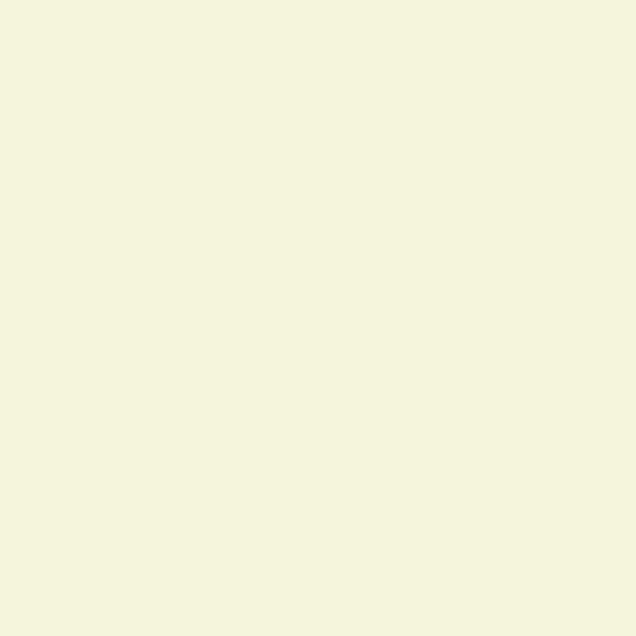

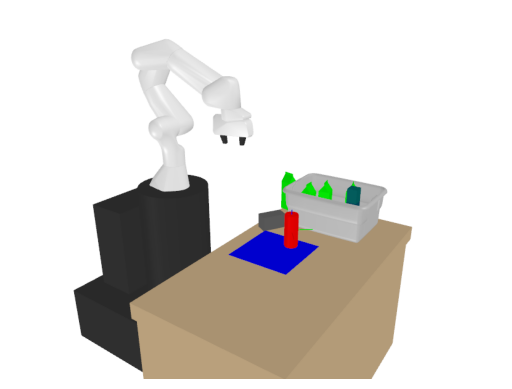

In [19]:
from pykin.utils.kin_utils import apply_robot_to_scene

mcts.rearr_action.scene_mngr.render.render_objects(mcts.tree.nodes[0]['state'].objs)
# pick.scene_mngr.render.trimesh_scene = apply_robot_to_scene(
#         trimesh_scene=pick.scene_mngr.render.trimesh_scene, 
#         robot=pick.scene_mngr.scene.robot,
#         geom="visual"
#             )
# pick.scene_mngr.render.set_camera_view()

mcts.rearr_action.simulate_path(
    final_pnp_all_joint_paths[0],
    final_pick_all_objects[0],
    final_place_all_object_poses[0],
    is_save=True,
#     video_name="pick_rearrangement1_only_current_scene",
    video_name="benchmark3_grasp_using_contact_graspnet_consider_next_scene",
)


In [17]:
mcts.history_level_2_dict

{0: {'nodes': [0, 1, 32, 33, 38, 42, 45, 47, 48], 'value': 6.18},
 1: {'nodes': [0, 4, 77, 78, 319, 321, 324, 325, 329, 331, 332],
  'value': 6.18}}

In [15]:
nodes

[0, 1, 32, 33, 39, 44, 47, 50, 52, 54, 55]

nodes [0, 1, 32, 33, 39, 44, 47, 50, 52, 54, 55]
Here doesn't have grasp


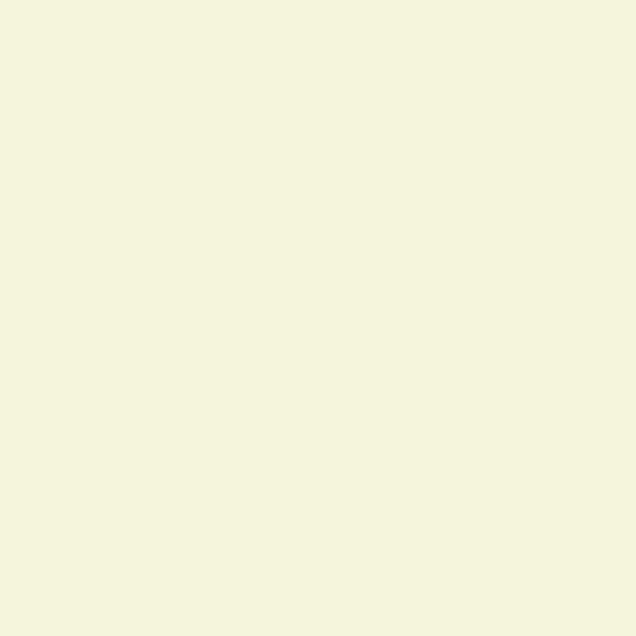

In [18]:
max_level_1_value = mcts.get_max_value_level_1()


fig, ax = p_utils.init_3d_figure(name="Level wise 1")

# nodes = mcts.infeasible_sub_nodes[0]
# nodes = mcts.history_level_1_dict[4]['nodes']
# j, nodes = mcts.get_max_value_nodes_level_1()

nodes = mcts.history_level_1_dict[4]['nodes']

print("nodes", nodes)
i = 0
for i in range(len(nodes)//2):
    mcts.rearr_action.deepcopy_scene(mcts.tree.nodes[nodes[2*(i)+1]]['state'])
    
    grasp = mcts.tree.nodes[nodes[2*(i)+1]].get('grasp_poses')
    if grasp:
        grasp = grasp[0]['grasp']
    else:
        print("Here doesn't have grasp")
        
        mcts.rearr_action.scene_mngr.render_objects(ax)
        p_utils.plot_basis(ax)
        mcts.rearr_action.show()
        break
    mcts.rearr_action.scene_mngr.set_gripper_pose(grasp)
    
    gripper_kinematics_info = mcts.rearr_action.scene_mngr.scene.robot.gripper.get_gripper_fk()

    gripper_tip_poses = mcts.scene_mngr.scene.robot.gripper.compute_gripper_tip_pose_from_gripper_pose()


    mcts.rearr_action.scene_mngr.render_axis(ax, gripper_kinematics_info['leftfinger'])
    mcts.rearr_action.scene_mngr.render_axis(ax, gripper_kinematics_info['rightfinger'])
    mcts.rearr_action.scene_mngr.render_axis(ax, mcts.scene_mngr.scene.robot.gripper.compute_gripper_tip_pose_from_gripper_pose(gripper_kinematics_info['rightfinger']))
    mcts.rearr_action.scene_mngr.render_axis(ax, mcts.scene_mngr.scene.robot.gripper.compute_gripper_tip_pose_from_gripper_pose(gripper_kinematics_info['leftfinger']))

    mcts.rearr_action.scene_mngr.render_axis(ax, mcts.rearr_action.scene_mngr.scene.robot.gripper.get_gripper_tcp_pose())
    mcts.rearr_action.scene_mngr.render_gripper(ax)

    mcts.rearr_action.scene_mngr.render_objects(ax)
    p_utils.plot_basis(ax)
    mcts.rearr_action.show()

In [33]:
nodes = mcts.history_level_1_dict[4]['nodes']

In [51]:
# from pytamp.utils.point_cloud_utils import get_combined_pc_from_mixed_scene
i = 0

current_node = mcts.tree.nodes[nodes[2*i + 1]]
next_node = mcts.tree.nodes[nodes[2*i + 2]]
obj_to_manipulate =current_node['action']['rearr_obj_name']

print(obj_to_manipulate)

grasps = mcts.grasp_generator.get_grasp(
    init_scene = benchmark3.init_scene,
    next_node = next_node,
    current_node = current_node,
    )

#next scene의 유무를 통해 combine하냐 마냐 나눠주는 함수 
# mcts.rearr_action.get_mixed_scene_on_next(
#                  next_scene=mcts.tree.nodes[max_value_nodes[2*(i+1)]]['state'],\
#                  current_scene=mcts.tree.nodes[max_value_nodes[2*i+1]]['state'],\
#                  obj_to_manipulate=obj_to_manipulate
#                  )

# mcts.rearr_action.get_mixed_scene_on_current(
#                  next_scene=mcts.tree.nodes[max_value_nodes[2*(i+1)]]['state'],\
#                  current_scene=mcts.tree.nodes[max_value_nodes[2*i+1]]['state'],\
#                  obj_to_manipulate=obj_to_manipulate
#                  )


# mcts.rearr_action.get_combined_pc_from_mixed_scene(
#                                                      next_scene=mcts.tree.nodes[max_value_nodes[2*(i+1)]]['state'],\
#                                                      current_scene=mcts.tree.nodes[max_value_nodes[2*i]]['state'],\
#                                                      obj_to_manipulate=obj_to_manipulate
#                                                      )



milk3
Extracted Region Cube Size:  0.4140609034817153
Random sample points 
Generated 9 grasps for object milk3


In [ ]:
fig, ax = p_utils.init_3d_figure(name="Level wise 1")
mcts.rearr_action.deepcopy_scene(mcts.tree.nodes[nodes[2*(i) +1]]['state'])

for grasp in grasps :
    mcts.rearr_action.scene_mngr.set_gripper_pose(grasp)
    mcts.rearr_action.scene_mngr.render_axis(ax, grasp)
# #     mcts.rearr_action.scene_mngr.render_axis(ax, mcts.rearr_action.scene_mngr.scene.robot.gripper.get_gripper_tcp_pose())
    
mcts.rearr_action.scene_mngr.render_objects(ax)
p_utils.plot_basis(ax)
mcts.rearr_action.show()

In [20]:
obj_file_path = '/home/juju/contact_graspnet/acronym/meshes/5Shelves/4382a7a2860ff8dda67210eeab485ee6.obj'